# Ayarlar ve Kütüphaneler

In [2]:
# # Jupyter Notebook'u tam sayfa yapmak için...
from IPython.display import display, HTML
display(HTML("<style>:root { --jp-notebook-max-width: 100% !important; }</style>"))

In [2]:
!pip install missingno
!pip install mlxtend
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import mlxtend
import warnings
import datetime as dt
!pip install lazypredict
!pip uninstall scikit-learn imbalanced-learn -y
!pip install scikit-learn==1.3.2 imbalanced-learn==0.11.0
!pip install --upgrade pandas seaborn
!pip install ipywidgets

from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 400)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.options.mode.chained_assignment = None

Found existing installation: scikit-learn 1.3.2
Uninstalling scikit-learn-1.3.2:
  Successfully uninstalled scikit-learn-1.3.2
Found existing installation: imbalanced-learn 0.11.0
Uninstalling imbalanced-learn-0.11.0:
  Successfully uninstalled imbalanced-learn-0.11.0
  Using cached scikit_learn-1.3.2-cp311-cp311-macosx_12_0_arm64.whl.metadata (11 kB)
  Using cached imbalanced_learn-0.11.0-py3-none-any.whl.metadata (8.3 kB)
Using cached scikit_learn-1.3.2-cp311-cp311-macosx_12_0_arm64.whl (9.4 MB)
Using cached imbalanced_learn-0.11.0-py3-none-any.whl (235 kB)


# Veri Okuma

In [4]:
df_read = pd.read_csv("diabetes.csv")

In [8]:
df_read.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72             35        0 33.60                      0.63   50        1
1            1       85             66             29        0 26.60                      0.35   31        0
2            8      183             64              0        0 23.30                      0.67   32        1
3            1       89             66             23       94 28.10                      0.17   21        0
4            0      137             40             35      168 43.10                      2.29   33        1

In [12]:
df = df_read.copy()
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72             35        0 33.60                      0.63   50        1
1            1       85             66             29        0 26.60                      0.35   31        0
2            8      183             64              0        0 23.30                      0.67   32        1
3            1       89             66             23       94 28.10                      0.17   21        0
4            0      137             40             35      168 43.10                      2.29   33        1

In [24]:
df.tail()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age  Outcome
763           10      101             76             48      180 32.90                      0.17   63        0
764            2      122             70             27        0 36.80                      0.34   27        0
765            5      121             72             23      112 26.20                      0.24   30        0
766            1      126             60              0        0 30.10                      0.35   47        1
767            1       93             70             31        0 30.40                      0.32   23        0

# Exploratory Data Analysis

In [27]:
df.shape

(768, 9)

In [29]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'], dtype='object')

In [31]:
df.index

RangeIndex(start=0, stop=768, step=1)

In [33]:
df.values

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [35]:
display(df.describe([0.01, 0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]).T)

count   mean    std   min    1%    5%   10%   20%    30%    40%    50%    60%    70%    80%    90%    95%    99%    max
Pregnancies              768.00   3.85   3.37  0.00  0.00  0.00  0.00  1.00   1.00   2.00   3.00   4.00   5.00   7.00   9.00  10.00  13.00  17.00
Glucose                  768.00 120.89  31.97  0.00 57.00 79.00 85.00 95.00 102.00 109.00 117.00 125.00 134.00 147.00 167.00 181.00 196.00 199.00
BloodPressure            768.00  69.11  19.36  0.00  0.00 38.70 54.00 60.00  64.00  68.00  72.00  74.00  78.00  82.00  88.00  90.00 106.00 122.00
SkinThickness            768.00  20.54  15.95  0.00  0.00  0.00  0.00  0.00   8.20  18.00  23.00  27.00  31.00  35.00  40.00  44.00  51.33  99.00
Insulin                  768.00  79.80 115.24  0.00  0.00  0.00  0.00  0.00   0.00   0.00  30.50  72.20 106.00 150.00 210.00 293.00 519.90 846.00
BMI                      768.00  31.99   7.88  0.00  0.00 21.80 23.60 25.90  28.20  30.10  32.00  33.70  35.49  37.80  41.50  44.39  50.76  67.10
DiabetesPedigreeFunction 768.00   0.47   0.33  0.08  0.09  0.14  0.17  0.22   0.26   0.30   0.37   0.45   0.56   0.69   0.88   1.13   1.70   2.42
Age                      768.00  33.24  11.76 21.00 21.00 21.00 22.00 23.00  25.00  27.00  29.00  33.00  38.00  42.60  51.00  58.00  67.00  81.00
Outcome                  768.00   0.35   0.48  0.00  0.00  0.00  0.00  0.00   0.00   0.00   0.00   0.00   1.00   1.00   1.00   1.00   1.00   1.00

In [37]:
missing_values = df.isnull().sum()
display(missing_values[missing_values > 0])

Series([], dtype: int64)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [41]:
df.columns.tolist()

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [43]:
df["Outcome"].value_counts()/df.shape[0]

Outcome
0   0.65
1   0.35
Name: count, dtype: float64

In [45]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [10]:
%whos DataFrame

Variable   Type         Data/Info
---------------------------------
df_read    DataFrame         Pregnancies  Glucose<...>       0.32   23        0


In [49]:
(df["BMI"] == 0).sum()

11

In [68]:
for col in df.columns:
    if df[col].dtype == "int64":
        print(df[col].value_counts())
        print("\n ############# \n")

NameError: name 'df' is not defined

## Değişkenlerin Ayrıştırılması

In [70]:
def grab_col_names(dataframe, cat_th=10,  car_th=20):
    """
    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.

    Parameters
    ----------
    dataframe: dataframe
        değişken isimleri alınmak istenen dataframe'dir.
    cat_th: int, float
        numerik fakat kategorik olan değişkenler için sınıf eşik değeri
    car_th: int, float
        kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    -------
    cat_cols: list
        Kategorik değişken listesi
    num_cols: list
        Numerik değişken listesi
    cat_but_car: list
        Kategorik görünümlü kardinal değişken listesi

    Notes
    ------
    cat_cols + num_cols + cat_but_car = toplam değişken sayısı
    num_but_cat cat_cols'un içerisinde.

    """
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category", "object", "bool"]]

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes in ["int", "float"]]

    cat_but_car = [col for col in dataframe.columns if
                   dataframe[col].nunique() > car_th and str(dataframe[col].dtypes) in ["category", "object"]]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["int", "float"]]
    num_cols = [col for col in num_cols if col not in cat_cols]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car, num_but_cat


In [74]:
cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(df)

Observations: 768
Variables: 9
cat_cols: 1
num_cols: 8
cat_but_car: 0
num_but_cat: 1


In [64]:
num_cols

NameError: name 'num_cols' is not defined

In [60]:
num_but_cat

['Outcome']

## Hedef Değişken Analizi (Analysis of Target Variable)

In [63]:
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")
    #target_summary_with_num fonksiyonu, belirli bir hedef değişkenin (örneğin bir sınıflandırma problemi için hedef etiket) altında belirli bir sayısal değişkenin ortalamasını hesaplar.
    #dataframe.groupby(target): Veri setini, belirtilen target değişkenine göre gruplar. Bu, her hedef sınıf için alt gruplar oluşturur.
    #.agg({numerical_col: "mean"}): Her grup için, belirtilen numerical_col sayısal değişkeninin ortalamasını hesaplar.
    #print(..., end="\n\n\n"): Hesaplanan ortalamaları ekrana yazdırır. end="\n\n\n" ifadesi, çıktının sonunda üç boş satır bırakılmasını sağlar

In [65]:
for col in num_cols:
    target_summary_with_num(df, "Outcome", col)

         Pregnancies
Outcome             
0               3.30
1               4.87


         Glucose
Outcome         
0         109.98
1         141.26


         BloodPressure
Outcome               
0                68.18
1                70.82


         SkinThickness
Outcome               
0                19.66
1                22.16


         Insulin
Outcome         
0          68.79
1         100.34


          BMI
Outcome      
0       30.30
1       35.14


         DiabetesPedigreeFunction
Outcome                          
0                            0.43
1                            0.55


          Age
Outcome      
0       31.19
1       37.07




## Korelasyon Analizi (Analysis of Correlation)

In [68]:
correlation = df.corr(numeric_only=True)  # sadece sayısal sütunlar için

In [70]:
correlation["Outcome"].drop("Outcome").sort_values(ascending=False)

Glucose                    0.47
BMI                        0.29
Age                        0.24
Pregnancies                0.22
DiabetesPedigreeFunction   0.17
Insulin                    0.13
SkinThickness              0.07
BloodPressure              0.07
Name: Outcome, dtype: float64

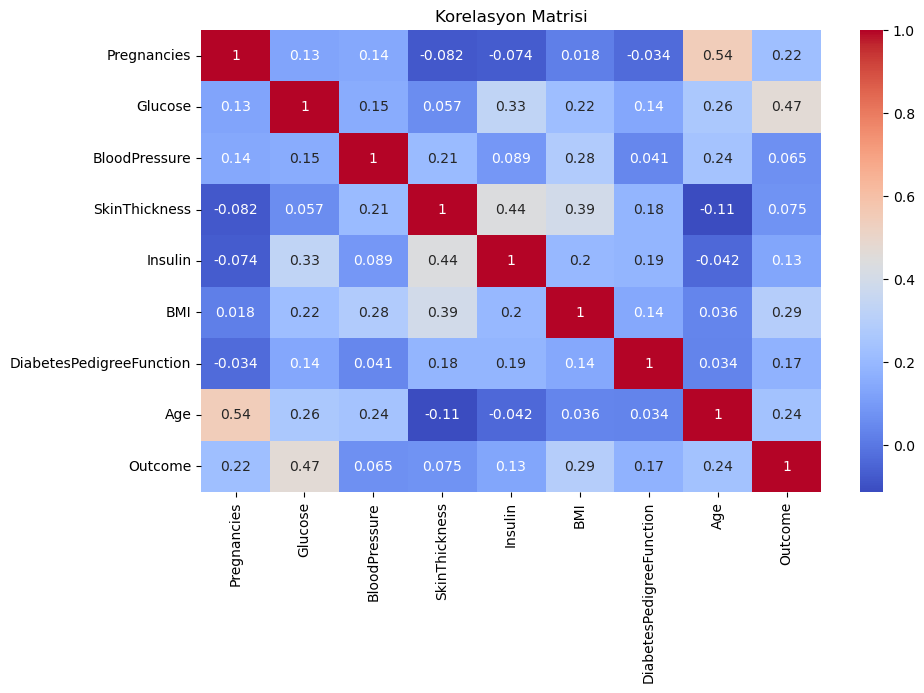

In [72]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Korelasyon Matrisi")
plt.show()

## Görselleştirme

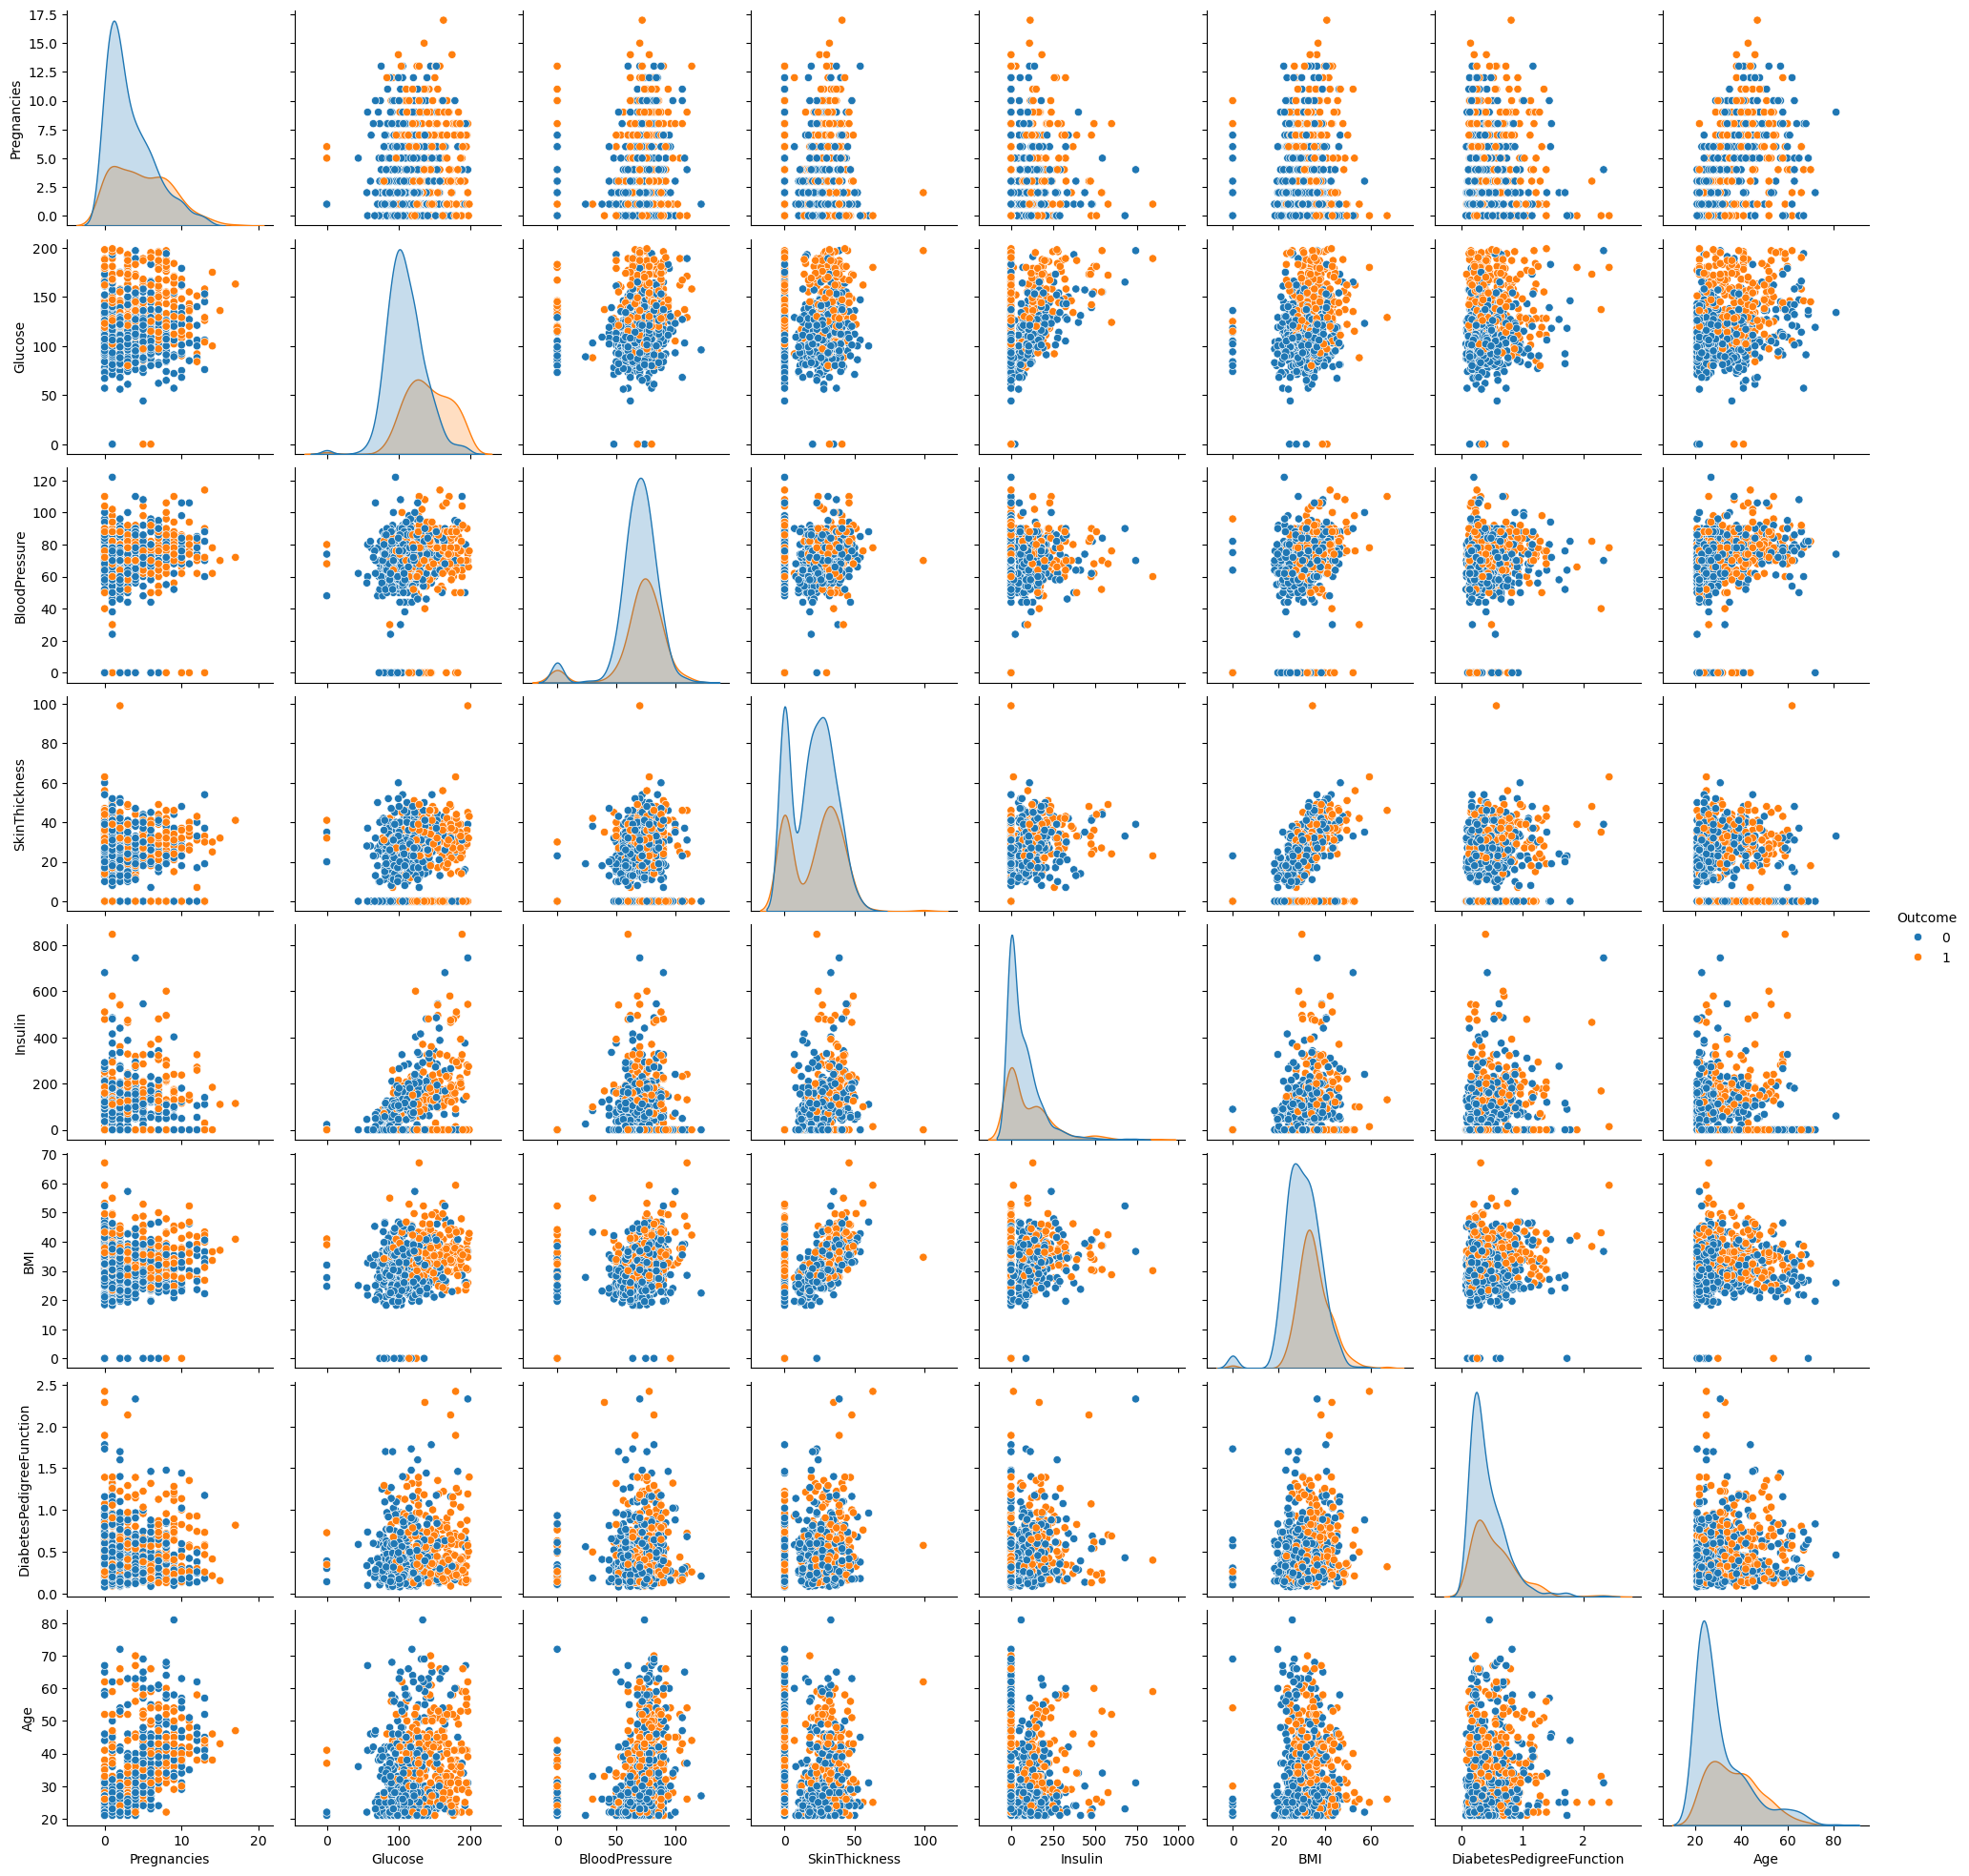

In [75]:
pair_plot = df
sns.pairplot(pair_plot, 
             hue='Outcome'
            )
plt.show();

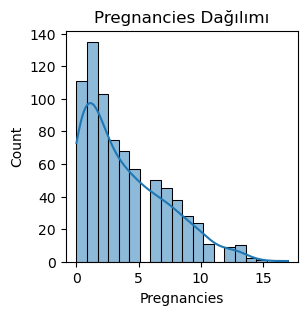

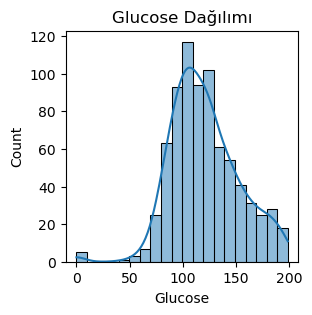

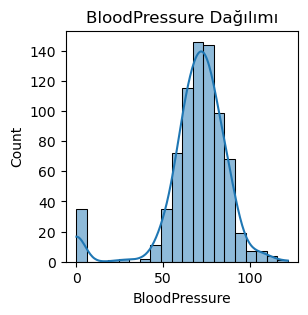

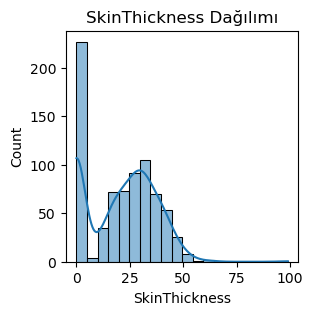

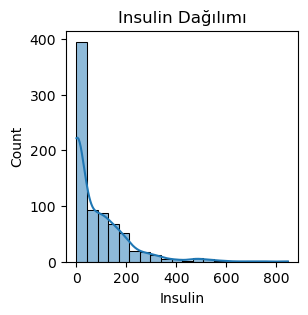

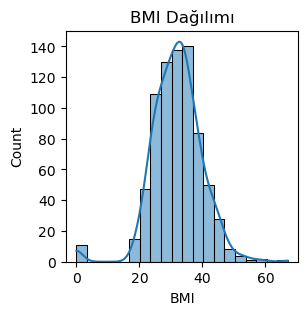

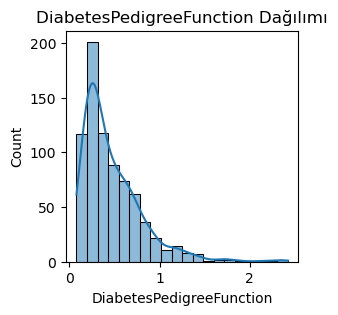

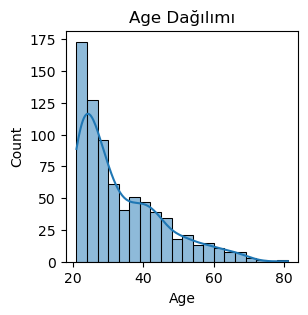

In [77]:
def plot_continuous_distributions(num_cols):
    for column in num_cols:
        plt.figure(figsize=(3, 3))
        sns.histplot(df[column], bins=20, kde=True)
        plt.title(f'{column} Dağılımı')
        plt.show()

# Fonksiyonu kullanmak için:
plot_continuous_distributions(num_cols)

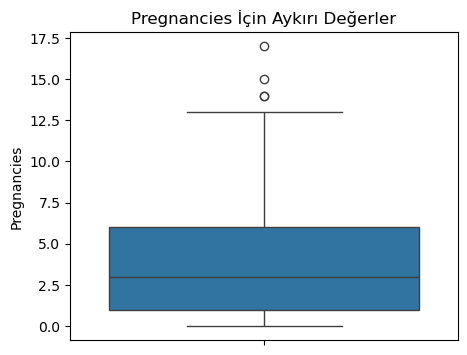

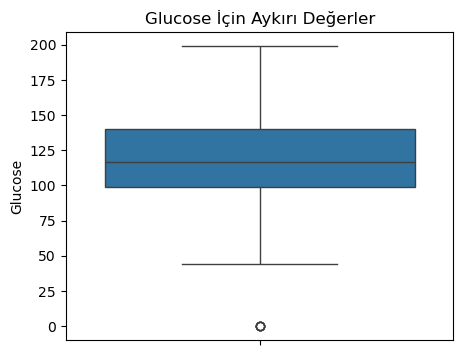

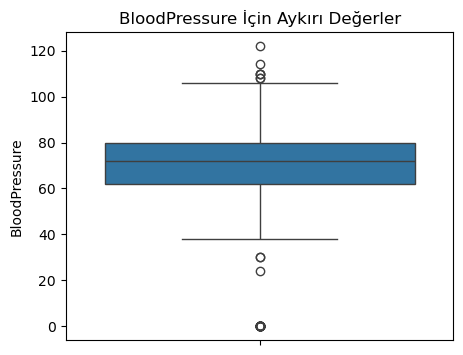

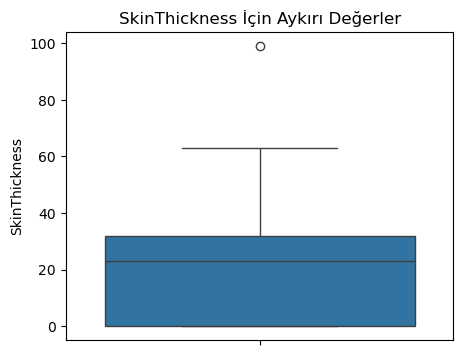

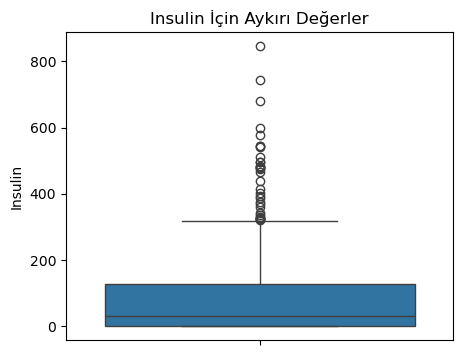

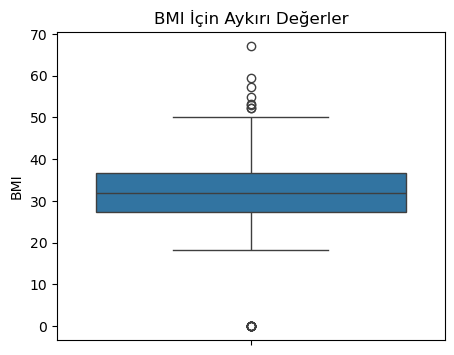

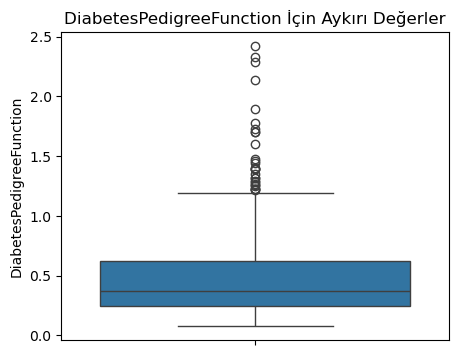

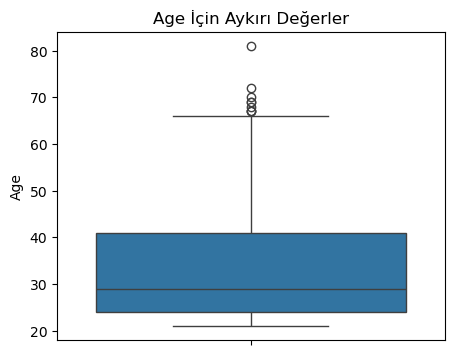

In [79]:
# Tüm veriler icin  B o x p l o t
for var in num_cols:
    plt.figure(figsize=(5,4))
    sns.boxplot(y=df[var])
    plt.title(f'{var} İçin Aykırı Değerler')
    plt.show()

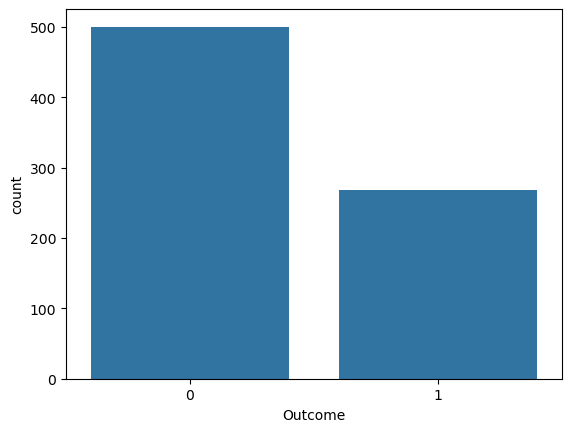

In [81]:
#Diyabetsiz / Diyabetli
sns.countplot(x='Outcome', data=df)
plt.show()

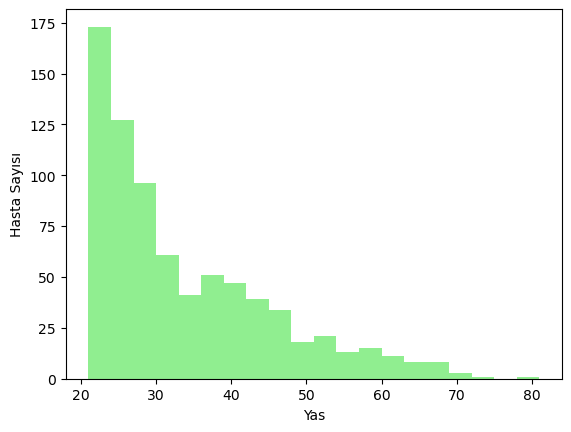

In [83]:
plt.hist(df['Age'], bins=20, color='lightgreen')

plt.xlabel("Yas")
plt.ylabel("Hasta Sayısı")
plt.show()

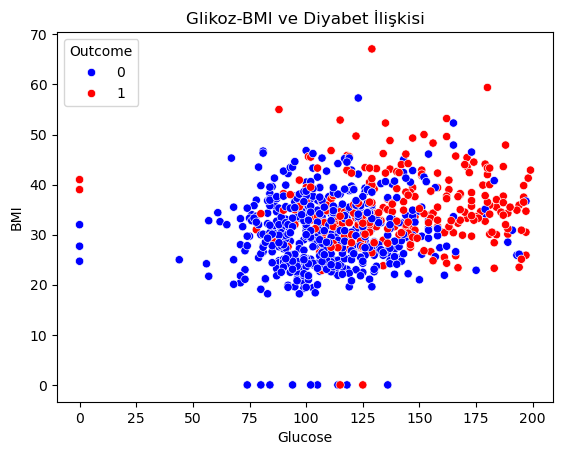

In [85]:
sns.scatterplot(x='Glucose', y='BMI', hue='Outcome', data=df, palette=['blue', 'red'])
plt.title("Glikoz-BMI ve Diyabet İlişkisi")
plt.show()

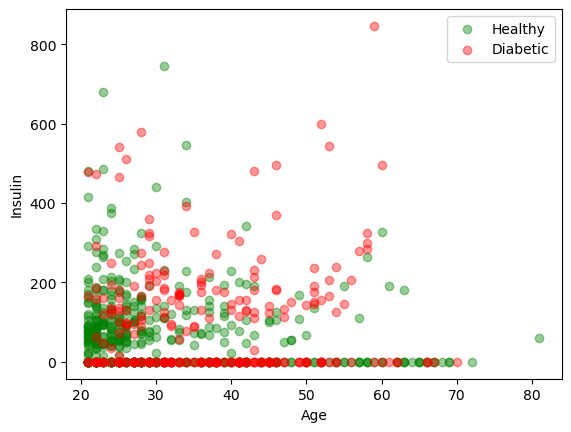

In [87]:
diabetic = df[df.Outcome == 1]
healthy = df[df.Outcome == 0]

plt.scatter(healthy.Age, healthy.Insulin, color="green", label="Healthy", alpha = 0.4)
plt.scatter(diabetic.Age, diabetic.Insulin, color="red", label="Diabetic", alpha = 0.4)
plt.xlabel("Age")
plt.ylabel("Insulin")
plt.legend()
plt.show()

## Missing Values

In [90]:
for column in df.columns:
    zero_count = (df[column] == 0).sum()
    if zero_count > 0:
        print(f"{column}: {zero_count} adet 0 değeri")
        print("\n ############# \n")

Pregnancies: 111 adet 0 değeri

 ############# 

Glucose: 5 adet 0 değeri

 ############# 

BloodPressure: 35 adet 0 değeri

 ############# 

SkinThickness: 227 adet 0 değeri

 ############# 

Insulin: 374 adet 0 değeri

 ############# 

BMI: 11 adet 0 değeri

 ############# 

Outcome: 500 adet 0 değeri

 ############# 



In [92]:
for column in df.columns:
    zero_count = (df[column] == 0).sum()/df.shape[0]
    if zero_count > 0:
        print(f"{column}: {zero_count:.2%} oranında 0 değeri")
        print("\n ############# \n")

Pregnancies: 14.45% oranında 0 değeri

 ############# 

Glucose: 0.65% oranında 0 değeri

 ############# 

BloodPressure: 4.56% oranında 0 değeri

 ############# 

SkinThickness: 29.56% oranında 0 değeri

 ############# 

Insulin: 48.70% oranında 0 değeri

 ############# 

BMI: 1.43% oranında 0 değeri

 ############# 

Outcome: 65.10% oranında 0 değeri

 ############# 



In [94]:
# Yaş gruplarını tanımlayalım
bins = [20, 35, 55, 100]  # Yaş aralıkları
labels = ['20-35 yaş', '36-54 yaş', '55 yaş ve üstü']

# Yaşları gruplandıran yeni kolon
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)


In [96]:
df["Age_Group"].value_counts()

Age_Group
20-35 yaş         488
36-54 yaş         226
55 yaş ve üstü     54
Name: count, dtype: int64

In [98]:
df.groupby(["Age_Group"], observed=False).agg({"Glucose":["mean","median"]}).reset_index()

Age_Group Glucose       
                     mean median
0       20-35 yaş  115.68 111.00
1       36-54 yaş  128.12 126.00
2  55 yaş ve üstü  137.72 136.50

In [100]:
df.groupby(["Outcome"], observed=False).agg({"Glucose":["mean","median"]}).reset_index()

Outcome Glucose       
             mean median
0       0  109.98 107.00
1       1  141.26 140.00

In [102]:
df.groupby(["Outcome"]).agg({"BloodPressure":["mean","median"],"Insulin":["mean","median"]}).reset_index()

Outcome BloodPressure        Insulin       
                   mean median    mean median
0       0         68.18  70.00   68.79  39.00
1       1         70.82  74.00  100.34   0.00

In [104]:
#data içerisinde 0 olan ama aslında null değerleri nan olarak değiştirme
zero_columns= [col for col in df.columns if (df[col].min() == 0 and col not in ['Pregnancies','Outcome'])]

In [106]:
zero_columns

['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [108]:
for col in zero_columns:
    df[col] = df[col].replace(0, np.nan)

In [110]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
Age_Group                     0
dtype: int64

In [112]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age  Outcome  Age_Group
0            6   148.00          72.00          35.00      NaN 33.60                      0.63   50        1  36-54 yaş
1            1    85.00          66.00          29.00      NaN 26.60                      0.35   31        0  20-35 yaş
2            8   183.00          64.00            NaN      NaN 23.30                      0.67   32        1  20-35 yaş
3            1    89.00          66.00          23.00    94.00 28.10                      0.17   21        0  20-35 yaş
4            0   137.00          40.00          35.00   168.00 43.10                      2.29   33        1  20-35 yaş

### Satır bazında nan değer analizi

In [115]:
# Her satırdaki boş değer sayısı
df['Eksik_Deger_Sayisi'] = df.isnull().sum(axis=1)
print(df.sort_values('Eksik_Deger_Sayisi', ascending=False))

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age  Outcome       Age_Group  Eksik_Deger_Sayisi
60             2    84.00            NaN            NaN      NaN   NaN                      0.30   21        0       20-35 yaş                   4
81             2    74.00            NaN            NaN      NaN   NaN                      0.10   22        0       20-35 yaş                   4
522            6   114.00            NaN            NaN      NaN   NaN                      0.19   26        0       20-35 yaş                   4
494            3    80.00            NaN            NaN      NaN   NaN                      0.17   22        0       20-35 yaş                   4
49             7   105.00            NaN            NaN      NaN   NaN                      0.30   24        0       20-35 yaş                   4
706           10   115.00            NaN            NaN      NaN   NaN                      0.26   30        1       2

In [117]:
#tahmin dü<eyi zorlaştığı ve çok fazla olmadığı için 4 farklı kolonda null verisi olan 7 satırı sildim
df = df[df.isnull().sum(axis=1) != 4]

In [119]:
df.drop("Eksik_Deger_Sayisi", axis=1, inplace=True)

In [121]:
df.shape

(761, 10)

### Verideki null değerleri ayırıp dolu hücrelerin median değerlerini Outcome kırılımında referans alarak boş verileri doldurduk.

In [135]:
df[df["Glucose"].isnull()].groupby(["Outcome", "Age_Group"], observed=False).size().reset_index(name="Glucose_Nan")

Empty DataFrame
Columns: [Outcome, Age_Group, Glucose_Nan]
Index: []

In [137]:
df[(df["Glucose"].notna())].groupby(["Outcome","Age_Group"], observed=False).agg({
    "Glucose": ["median","count"]
}).reset_index()

Outcome       Age_Group Glucose      
                           median count
0       0       20-35 yaş  106.00   356
1       0       36-54 yaş  110.00   102
2       0  55 yaş ve üstü  130.50    36
3       1       20-35 yaş  136.00   125
4       1       36-54 yaş  143.00   124
5       1  55 yaş ve üstü  152.00    18

In [139]:
# Outcome = 0, Age_Group = 20-35 yaş
df.loc[(df['Outcome'] == 0) & (df['Age_Group'] == '20-35 yaş') & (df['Glucose'].isnull()), 'Glucose'] = 106.00

# Outcome = 0, Age_Group = 36-54 yaş
df.loc[(df['Outcome'] == 0) & (df['Age_Group'] == '36-54 yaş') & (df['Glucose'].isnull()), 'Glucose'] = 110.00

# Outcome = 0, Age_Group = 55 yaş ve üstü
df.loc[(df['Outcome'] == 0) & (df['Age_Group'] == '55 yaş ve üstü') & (df['Glucose'].isnull()), 'Glucose'] = 130.50

# Outcome = 1, Age_Group = 20-35 yaş
df.loc[(df['Outcome'] == 1) & (df['Age_Group'] == '20-35 yaş') & (df['Glucose'].isnull()), 'Glucose'] = 136.00

# Outcome = 1, Age_Group = 36-54 yaş
df.loc[(df['Outcome'] == 1) & (df['Age_Group'] == '36-54 yaş') & (df['Glucose'].isnull()), 'Glucose'] = 143.00

# Outcome = 1, Age_Group = 55 yaş ve üstü
df.loc[(df['Outcome'] == 1) & (df['Age_Group'] == '55 yaş ve üstü') & (df['Glucose'].isnull()), 'Glucose'] = 152.00

In [141]:
df.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                28
SkinThickness               220
Insulin                     367
BMI                           4
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
Age_Group                     0
dtype: int64

In [143]:
df[df["BloodPressure"].isnull()].groupby(["Outcome", "Age_Group"], observed=False).size().reset_index(name="BloodPressure_Nan")

Outcome       Age_Group  BloodPressure_Nan
0        0       20-35 yaş                  9
1        0       36-54 yaş                  3
2        0  55 yaş ve üstü                  1
3        1       20-35 yaş                 10
4        1       36-54 yaş                  5
5        1  55 yaş ve üstü                  0

In [145]:
df[(df["BloodPressure"].notna())].groupby(["Outcome","Age_Group"], observed=False).agg({
    "BloodPressure": ["median","count"]
}).reset_index()

Outcome       Age_Group BloodPressure      
                                 median count
0       0       20-35 yaş         68.00   347
1       0       36-54 yaş         76.00    99
2       0  55 yaş ve üstü         78.00    35
3       1       20-35 yaş         72.00   115
4       1       36-54 yaş         78.00   119
5       1  55 yaş ve üstü         80.00    18

In [147]:
# Outcome = 0, Age_Group = 20-35 yaş
df.loc[(df['Outcome'] == 0) & (df['Age_Group'] == '20-35 yaş') & (df['BloodPressure'].isnull()), 'BloodPressure'] = 68.00

# Outcome = 0, Age_Group = 36-54 yaş
df.loc[(df['Outcome'] == 0) & (df['Age_Group'] == '36-54 yaş') & (df['BloodPressure'].isnull()), 'BloodPressure'] = 76.00

# Outcome = 0, Age_Group = 55 yaş ve üstü
df.loc[(df['Outcome'] == 0) & (df['Age_Group'] == '55 yaş ve üstü') & (df['BloodPressure'].isnull()), 'BloodPressure'] = 78.00

# Outcome = 1, Age_Group = 20-35 yaş
df.loc[(df['Outcome'] == 1) & (df['Age_Group'] == '20-35 yaş') & (df['BloodPressure'].isnull()), 'BloodPressure'] = 72.00

# Outcome = 1, Age_Group = 36-54 yaş
df.loc[(df['Outcome'] == 1) & (df['Age_Group'] == '36-54 yaş') & (df['BloodPressure'].isnull()), 'BloodPressure'] = 78.00

# Outcome = 1, Age_Group = 55 yaş ve üstü
df.loc[(df['Outcome'] == 1) & (df['Age_Group'] == '55 yaş ve üstü') & (df['BloodPressure'].isnull()), 'BloodPressure'] = 80.00

In [149]:
df.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness               220
Insulin                     367
BMI                           4
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
Age_Group                     0
dtype: int64

In [151]:
df[df["SkinThickness"].isnull()].groupby(["Outcome", "Age_Group"], observed=False).size().reset_index(name="SkinThickness_Nan")

Outcome       Age_Group  SkinThickness_Nan
0        0       20-35 yaş                 72
1        0       36-54 yaş                 40
2        0  55 yaş ve üstü                 21
3        1       20-35 yaş                 37
4        1       36-54 yaş                 43
5        1  55 yaş ve üstü                  7

In [153]:
df[(df["SkinThickness"].notna())].groupby(["Outcome","Age_Group"], observed=False).agg({
    "SkinThickness": ["median","count"]
}).reset_index()

Outcome       Age_Group SkinThickness      
                                 median count
0       0       20-35 yaş         25.50   284
1       0       36-54 yaş         30.50    62
2       0  55 yaş ve üstü         31.00    15
3       1       20-35 yaş         35.00    88
4       1       36-54 yaş         31.00    81
5       1  55 yaş ve üstü         33.00    11

In [155]:
df[(df["SkinThickness"].notna())].groupby(["Outcome"], observed=False).agg({
    "SkinThickness": ["median","count"]
}).reset_index()
#55 yaş ve üstü	grubunda yeterli gözlem olmadığı için bu sınıfta sadece Outcome kırılımındaki median değeri baz alındı

Outcome SkinThickness      
                 median count
0       0         27.00   361
1       1         32.00   180

In [157]:
# Outcome = 0, Age_Group = 20-35 yaş
df.loc[(df['Outcome'] == 0) & (df['Age_Group'] == '20-35 yaş') & (df['SkinThickness'].isnull()), 'SkinThickness'] = 25.50

# Outcome = 0, Age_Group = 36-54 yaş
df.loc[(df['Outcome'] == 0) & (df['Age_Group'] == '36-54 yaş') & (df['SkinThickness'].isnull()), 'SkinThickness'] = 30.50

# Outcome = 0, Age_Group = 55 yaş ve üstü
df.loc[(df['Outcome'] == 0) & (df['Age_Group'] == '55 yaş ve üstü') & (df['SkinThickness'].isnull()), 'SkinThickness'] = 27.00

# Outcome = 1, Age_Group = 20-35 yaş
df.loc[(df['Outcome'] == 1) & (df['Age_Group'] == '20-35 yaş') & (df['SkinThickness'].isnull()), 'SkinThickness'] = 35.00

# Outcome = 1, Age_Group = 36-54 yaş
df.loc[(df['Outcome'] == 1) & (df['Age_Group'] == '36-54 yaş') & (df['SkinThickness'].isnull()), 'SkinThickness'] = 31.00

# Outcome = 1, Age_Group = 55 yaş ve üstü
df.loc[(df['Outcome'] == 1) & (df['Age_Group'] == '55 yaş ve üstü') & (df['SkinThickness'].isnull()), 'SkinThickness'] = 32.00

In [159]:
df.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                     367
BMI                           4
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
Age_Group                     0
dtype: int64

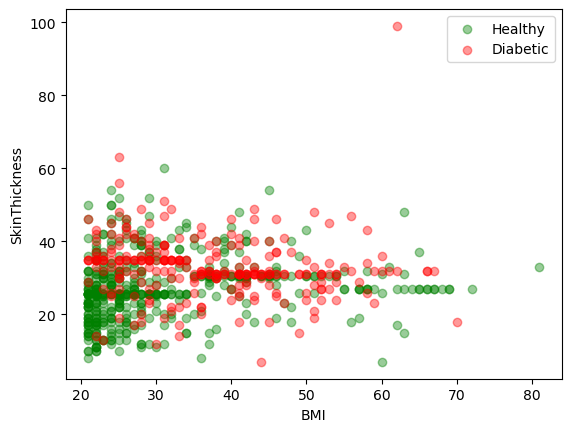

In [161]:
diabetic = df[df.Outcome == 1]
healthy = df[df.Outcome == 0]

plt.scatter(healthy.Age, healthy.SkinThickness, color="green", label="Healthy", alpha = 0.4)
plt.scatter(diabetic.Age, diabetic.SkinThickness, color="red", label="Diabetic", alpha = 0.4)
plt.xlabel("BMI")
plt.ylabel("SkinThickness")
plt.legend()
plt.show()

In [163]:
df[df["Insulin"].isnull()].groupby(["Outcome", "Age_Group"], observed=False).size().reset_index(name="Insulin_Nan")

Outcome       Age_Group  Insulin_Nan
0        0       20-35 yaş          139
1        0       36-54 yaş           62
2        0  55 yaş ve üstü           29
3        1       20-35 yaş           55
4        1       36-54 yaş           72
5        1  55 yaş ve üstü           10

In [165]:
df[(df["Insulin"].notna())].groupby(["Outcome","Age_Group"], observed=False).agg({
    "Insulin": ["median","count"]
}).reset_index()

Outcome       Age_Group Insulin      
                           median count
0       0       20-35 yaş  100.00   217
1       0       36-54 yaş  105.00    40
2       0  55 yaş ve üstü  190.00     7
3       1       20-35 yaş  166.00    70
4       1       36-54 yaş  175.00    52
5       1  55 yaş ve üstü  292.50     8

In [167]:
df[(df["Insulin"].notna())].groupby(["Outcome"], observed=False).agg({
    "Insulin": ["median","count"]
}).reset_index()
#55 yaş ve üstü	grubunda yeterli gözlem olmadığı için bu sınıfta sadece Outcome kırılımındaki median değeri baz alındı

Outcome Insulin      
           median count
0       0  102.50   264
1       1  169.50   130

In [169]:
# Outcome = 0, Age_Group = 20-35 yaş
df.loc[(df['Outcome'] == 0) & (df['Age_Group'] == '20-35 yaş') & (df['Insulin'].isnull()), 'Insulin'] = 100.00

# Outcome = 0, Age_Group = 36-54 yaş
df.loc[(df['Outcome'] == 0) & (df['Age_Group'] == '36-54 yaş') & (df['Insulin'].isnull()), 'Insulin'] = 105.00

# Outcome = 0, Age_Group = 55 yaş ve üstü
df.loc[(df['Outcome'] == 0) & (df['Age_Group'] == '55 yaş ve üstü') & (df['Insulin'].isnull()), 'Insulin'] = 102.50	

# Outcome = 1, Age_Group = 20-35 yaş
df.loc[(df['Outcome'] == 1) & (df['Age_Group'] == '20-35 yaş') & (df['Insulin'].isnull()), 'Insulin'] = 166.00

# Outcome = 1, Age_Group = 36-54 yaş
df.loc[(df['Outcome'] == 1) & (df['Age_Group'] == '36-54 yaş') & (df['Insulin'].isnull()), 'Insulin'] = 175.00

# Outcome = 1, Age_Group = 55 yaş ve üstü
df.loc[(df['Outcome'] == 1) & (df['Age_Group'] == '55 yaş ve üstü') & (df['Insulin'].isnull()), 'Insulin'] = 169.50

In [171]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         4
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
Age_Group                   0
dtype: int64

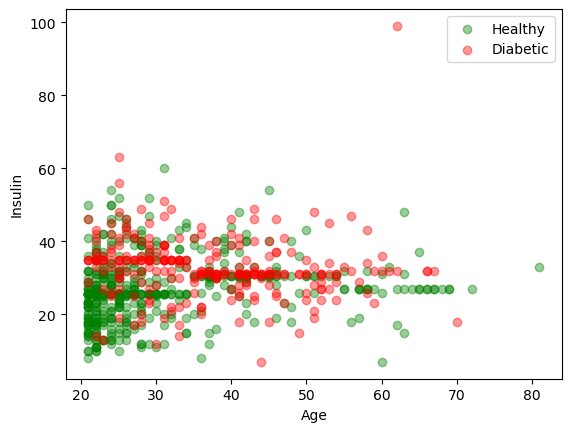

In [173]:
diabetic = df[df.Outcome == 1]
healthy = df[df.Outcome == 0]

plt.scatter(healthy.Age, healthy.SkinThickness, color="green", label="Healthy", alpha = 0.4)
plt.scatter(diabetic.Age, diabetic.SkinThickness, color="red", label="Diabetic", alpha = 0.4)
plt.xlabel("Age")
plt.ylabel("Insulin")
plt.legend()
plt.show()

In [175]:
df[df["BMI"].isnull()].groupby(["Outcome", "Age_Group"], observed=False).size().reset_index(name="BMI_Nan")

Outcome       Age_Group  BMI_Nan
0        0       20-35 yaş        2
1        0       36-54 yaş        0
2        0  55 yaş ve üstü        1
3        1       20-35 yaş        0
4        1       36-54 yaş        1
5        1  55 yaş ve üstü        0

In [177]:
df[(df["BMI"].notna())].groupby(["Outcome","Age_Group"], observed=False).agg({
    "BMI": ["median","count"]
}).reset_index()

Outcome       Age_Group    BMI      
                          median count
0       0       20-35 yaş  29.90   354
1       0       36-54 yaş  32.55   102
2       0  55 yaş ve üstü  26.80    35
3       1       20-35 yaş  34.30   125
4       1       36-54 yaş  34.30   123
5       1  55 yaş ve üstü  32.25    18

In [179]:
# Outcome = 0, Age_Group = 20-35 yaş
df.loc[(df['Outcome'] == 0) & (df['Age_Group'] == '20-35 yaş') & (df['BMI'].isnull()), 'BMI'] = 29.90

# Outcome = 0, Age_Group = 55 yaş ve üstü
df.loc[(df['Outcome'] == 0) & (df['Age_Group'] == '55 yaş ve üstü') & (df['BMI'].isnull()), 'BMI'] = 26.80

# Outcome = 1, Age_Group = 36-54 yaş
df.loc[(df['Outcome'] == 1) & (df['Age_Group'] == '36-54 yaş') & (df['BMI'].isnull()), 'BMI'] = 34.30

In [181]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
Age_Group                   0
dtype: int64

## Outliers

In [58]:
fig = plt.figure(figsize=(30,150))
for index,col in enumerate(num_cols):
    plt.subplot(26,2,index+1)
    sns.boxplot(x=col, data=df.dropna(), color='navy')
    plt.ylabel('COUNT', size = 25,color="black" )
    plt.xlabel(col, fontsize = 25,color="black" )
    plt.xticks(size = 20,color="black", rotation = 45 )
    plt.yticks(size = 20,color="black" )

fig.tight_layout(pad=1.0)

NameError: name 'num_cols' is not defined

<Figure size 3000x15000 with 0 Axes>

In [186]:
display(df.describe([0.01, 0.05, 0.10, 0.25, 0.30, 0.40, 0.50, 0.60, 0.75, 0.80, 0.90, 0.95, 0.99]).T)

count   mean   std   min    1%    5%   10%    25%    30%    40%    50%    60%    75%    80%    90%    95%    99%    max
Pregnancies              761.00   3.84  3.37  0.00  0.00  0.00  0.00   1.00   1.00   2.00   3.00   4.00   6.00   7.00   9.00  10.00  13.00  17.00
Glucose                  761.00 121.93 30.47 44.00 67.60 80.00 87.00 100.00 103.00 109.00 117.00 125.00 141.00 147.00 167.00 181.00 196.00 199.00
BloodPressure            761.00  72.41 12.17 24.00 44.00 52.00 58.00  64.00  66.00  70.00  72.00  75.00  80.00  82.00  88.00  90.00 106.00 122.00
SkinThickness            761.00  29.23  9.02  7.00 10.00 14.00 18.00  25.00  25.50  27.00  30.00  31.00  35.00  35.00  40.00  44.00  51.40  99.00
Insulin                  761.00 142.04 89.66 14.00 24.20 50.00 67.00 100.00 100.00 102.50 105.00 140.00 175.00 175.00 210.00 293.00 522.00 846.00
BMI                      761.00  32.45  6.91 18.20 19.50 22.20 24.00  27.50  28.40  30.20  32.30  33.80  36.60  37.80  41.50  44.50  50.92  67.10
DiabetesPedigreeFunction 761.00   0.47  0.33  0.08  0.09  0.14  0.17   0.24   0.26   0.30   0.38   0.46   0.63   0.69   0.88   1.14   1.70   2.42
Age                      761.00  33.32 11.78 21.00 21.00 21.00 22.00  24.00  25.00  27.00  29.00  33.00  41.00  43.00  51.00  58.00  67.00  81.00
Outcome                  761.00   0.35  0.48  0.00  0.00  0.00  0.00   0.00   0.00   0.00   0.00   0.00   1.00   1.00   1.00   1.00   1.00   1.00

In [38]:
# outlier eşiğini belirliyoruz
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [190]:
for col in num_cols:
    print(col, outlier_thresholds(df, col))

Pregnancies (-6.5, 13.5)
Glucose (38.5, 202.5)
BloodPressure (40.0, 104.0)
SkinThickness (10.0, 50.0)
Insulin (-12.5, 287.5)
BMI (13.849999999999998, 50.25)
DiabetesPedigreeFunction (-0.3335, 1.2065000000000001)
Age (-1.5, 66.5)


In [40]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    outliers = dataframe[col_name][(dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit)]
    return outliers.any() 

In [194]:
for col in num_cols:
    print(col, check_outlier(df, col))

Pregnancies True
Glucose False
BloodPressure True
SkinThickness True
Insulin True
BMI True
DiabetesPedigreeFunction True
Age True


In [42]:
# trashold değerlerine baskılama fonksiyonu
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [198]:
for col in num_cols:
    replace_with_thresholds(df, col)

In [200]:
for col in num_cols:
    print(col, check_outlier(df, col))

Pregnancies False
Glucose False
BloodPressure False
SkinThickness False
Insulin False
BMI False
DiabetesPedigreeFunction False
Age False


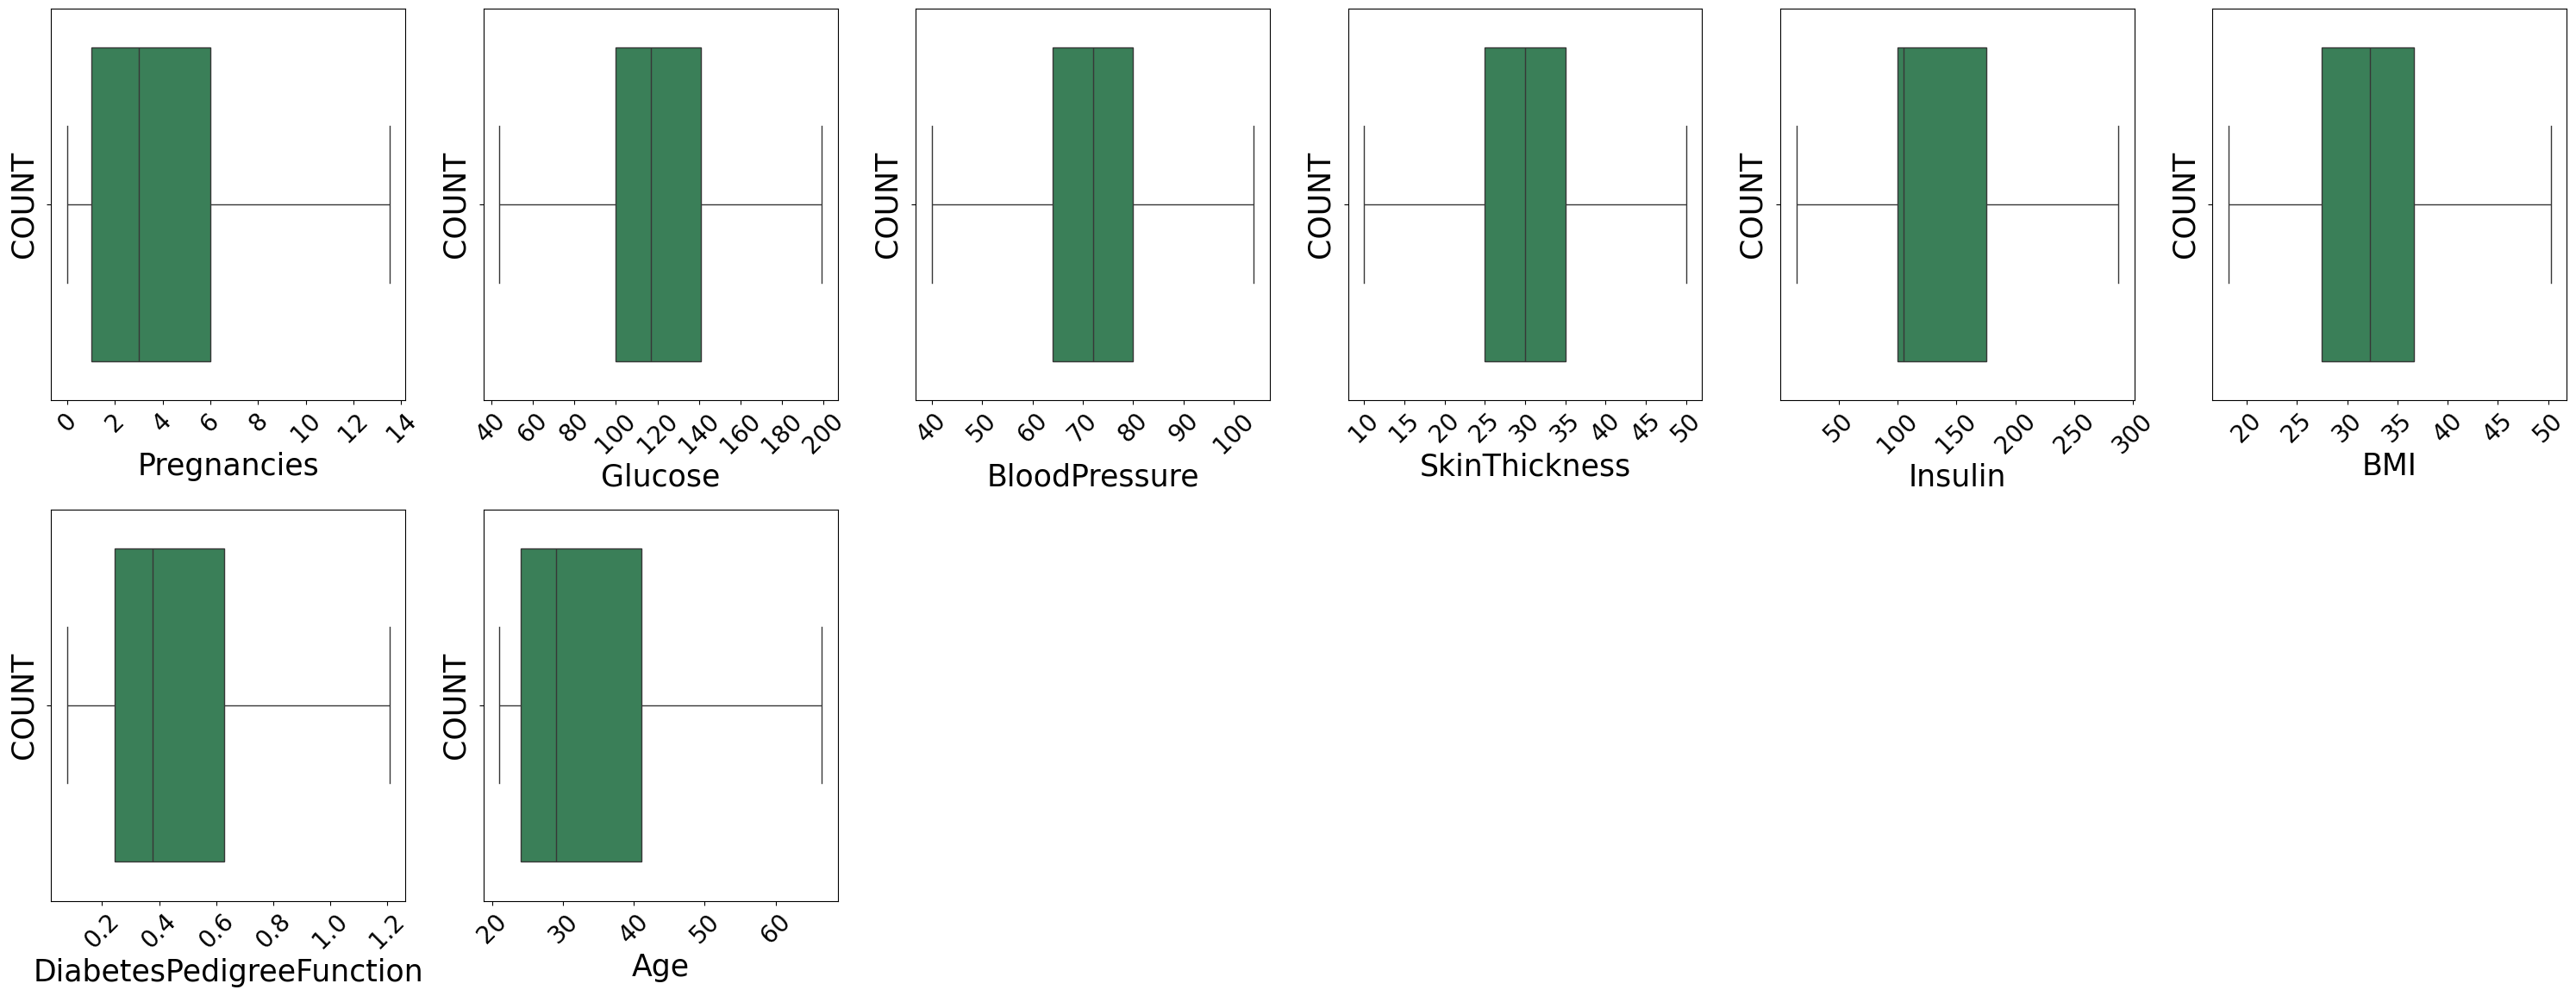

In [202]:
# After capping Outliers

fig = plt.figure(figsize=(30,150))
for index,col in enumerate(num_cols):
    plt.subplot(26,6,index+1)
    sns.boxplot(x=col, data=df.dropna(), color='seagreen')
    plt.ylabel('COUNT', size = 25,color="black" )
    plt.xlabel(col, fontsize = 25,color="black" )
    plt.xticks(size = 20,color="black", rotation = 45 )
    plt.yticks(size = 20,color="black" )

fig.tight_layout(pad=1.0)

# CLUSTER - K-MEANS

In [159]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

#import argparse
#from data_prep import *
#from yellowbrick.cluster import KElbowVisualizer
#from pandas.core.common import SettingWithCopyWarning
#warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)


In [207]:
K_means_data = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]

In [209]:
K = range(2, 12)

In [211]:
for i in K:
    print(i)

2
3
4
5
6
7
8
9
10
11


In [213]:
kmeans = KMeans(n_clusters=6).fit(K_means_data)

In [215]:
print(kmeans.inertia_)

642685.1666235533


In [217]:
for k in K:
    kmeans = KMeans(n_clusters=k).fit(K_means_data)
    print("kume sayisi : ",k, kmeans.inertia_)
    
    
#kumeler arasi bezemezlik / kume ici benzerlik

kume sayisi :  2 1713386.9344560923
kume sayisi :  3 1122363.1614506836
kume sayisi :  4 921494.8608106317
kume sayisi :  5 776765.3072785353
kume sayisi :  6 642684.5211229157
kume sayisi :  7 599030.3692901074
kume sayisi :  8 559705.1820958359
kume sayisi :  9 533712.7646468156
kume sayisi :  10 506420.3525997816
kume sayisi :  11 482723.441696855


1713386.9344560923
1122363.1614506836
921543.7161211428
770769.0217119872
642681.6325530092
599030.3692901074
560401.6125353463
533761.5331857314
506203.7877967654
482631.17205905623


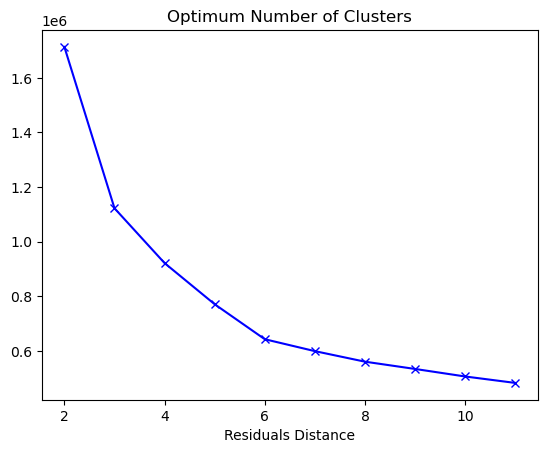

In [219]:
#kmeans = KMeans()
ssd = []
K = range(2, 12)

for k in K:
    kmeans = KMeans(n_clusters=k).fit(K_means_data)
    print(kmeans.inertia_)
    ssd.append(kmeans.inertia_)
    
    
plt.plot(K, ssd, "bx-")
plt.xlabel("Residuals Distance")
plt.title("Optimum Number of Clusters")
plt.show()    

#Inertia, bir veri setinin K-Means ile ne kadar iyi kümelendiğini ölçer. 
#Bu, her veri noktası ile onun merkezi arasındaki mesafenin ölçülmesi, bu mesafenin karesinin alınması 
#ve bu karelerin bir küme içinde toplanmasıyla hesaplanır.

In [221]:
kmeans = KMeans(n_clusters=6).fit(K_means_data)
K_means_data["Clusters"] = kmeans.labels_

In [223]:
K_means_data["Clusters"].value_counts()

Clusters
4    228
3    145
5    131
1     95
0     94
2     68
Name: count, dtype: int64

In [225]:
K_means_data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction   Age  Clusters
0         6.00   148.00          72.00          35.00   175.00 33.60                      0.63 50.00         1
1         1.00    85.00          66.00          29.00   100.00 26.60                      0.35 31.00         4
2         8.00   183.00          64.00          35.00   166.00 23.30                      0.67 32.00         1
3         1.00    89.00          66.00          23.00    94.00 28.10                      0.17 21.00         4
4         0.00   137.00          40.00          35.00   168.00 43.10                      1.21 33.00         3

In [227]:
K_means_data_f = df[["Age_Group","Outcome"]].merge(K_means_data, left_index=True, right_index=True)

In [229]:
pd.crosstab(df["Age_Group"],K_means_data["Clusters"])

Clusters         0   1   2   3    4   5
Age_Group                              
20-35 yaş       81  34  45  88  176  57
36-54 yaş       13  52  15  51   43  52
55 yaş ve üstü   0   9   8   6    9  22

In [231]:
pd.crosstab(df["Outcome"],K_means_data["Clusters"])

Clusters   0   1   2    3    4    5
Outcome                            
0         86   8  32   44  219  105
1          8  87  36  101    9   26

In [233]:
K_means_data = df[["Outcome"]].merge(K_means_data, left_index=True, right_index=True)

In [235]:
K_means_data.head()

Outcome  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction   Age  Clusters
0        1         6.00   148.00          72.00          35.00   175.00 33.60                      0.63 50.00         1
1        0         1.00    85.00          66.00          29.00   100.00 26.60                      0.35 31.00         4
2        1         8.00   183.00          64.00          35.00   166.00 23.30                      0.67 32.00         1
3        0         1.00    89.00          66.00          23.00    94.00 28.10                      0.17 21.00         4
4        1         0.00   137.00          40.00          35.00   168.00 43.10                      1.21 33.00         3

# Supervise

### Base Model

In [239]:
df_no_object= df[['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age','Outcome']]

In [241]:
df_no_object

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction   Age  Outcome
0           6.00   148.00          72.00          35.00   175.00 33.60                      0.63 50.00        1
1           1.00    85.00          66.00          29.00   100.00 26.60                      0.35 31.00        0
2           8.00   183.00          64.00          35.00   166.00 23.30                      0.67 32.00        1
3           1.00    89.00          66.00          23.00    94.00 28.10                      0.17 21.00        0
4           0.00   137.00          40.00          35.00   168.00 43.10                      1.21 33.00        1
5           5.00   116.00          74.00          25.50   100.00 25.60                      0.20 30.00        0
6           3.00    78.00          50.00          32.00    88.00 31.00                      0.25 26.00        1
7          10.00   115.00          68.00          25.50   100.00 35.30                      0.13 29.00        0
8           2.00   197.00          70.00          45.00   287.50 30.50                      0.16 53.00        1
9           8.00   125.00          96.00          31.00   175.00 34.30                      0.23 54.00        1
10          4.00   110.00          92.00          25.50   100.00 37.60                      0.19 30.00        0
11         10.00   168.00          74.00          35.00   166.00 38.00                      0.54 34.00        1
12         10.00   139.00          80.00          27.00   102.50 27.10                      1.21 57.00        0
13          1.00   189.00          60.00          23.00   287.50 30.10                      0.40 59.00        1
14          5.00   166.00          72.00          19.00   175.00 25.80                      0.59 51.00        1
15          7.00   100.00          72.00          35.00   166.00 30.00                      0.48 32.00        1
16          0.00   118.00          84.00          47.00   230.00 45.80                      0.55 31.00        1
17          7.00   107.00          74.00          35.00   166.00 29.60                      0.25 31.00        1
18          1.00   103.00          40.00          38.00    83.00 43.30                      0.18 33.00        0
19          1.00   115.00          70.00          30.00    96.00 34.60                      0.53 32.00        1
20          3.00   126.00          88.00          41.00   235.00 39.30                      0.70 27.00        0
21          8.00    99.00          84.00          30.50   105.00 35.40                      0.39 50.00        0
22          7.00   196.00          90.00          31.00   175.00 39.80                      0.45 41.00        1
23          9.00   119.00          80.00          35.00   166.00 29.00                      0.26 29.00        1
24         11.00   143.00          94.00          33.00   146.00 36.60                      0.25 51.00        1
25         10.00   125.00          70.00          26.00   115.00 31.10                      0.20 41.00        1
26          7.00   147.00          76.00          31.00   175.00 39.40                      0.26 43.00        1
27          1.00    97.00          66.00          15.00   140.00 23.20                      0.49 22.00        0
28         13.00   145.00          82.00          19.00   110.00 22.20                      0.24 57.00        0
29          5.00   117.00          92.00          30.50   105.00 34.10                      0.34 38.00        0
30          5.00   109.00          75.00          26.00   102.50 36.00                      0.55 60.00        0
31          3.00   158.00          76.00          36.00   245.00 31.60                      0.85 28.00        1
32          3.00    88.00          58.00          11.00    54.00 24.80                      0.27 22.00        0
33          6.00    92.00          92.00          25.50   100.00 19.90                      0.19 28.00        0
34         10.00   122.00          78.00          31.00   105.00 27.60               

In [245]:
X = df_no_object.drop('Outcome', axis=1)
y = df_no_object['Outcome']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print ("X_train: ", X_train.shape)
print ("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print ("y_test: ", y_test.shape)

X_train:  (608, 8)
y_train:  (608,)
X_test:  (153, 8)
y_test:  (153,)


In [247]:
from lazypredict.Supervised import LazyClassifier
from sklearn.metrics import recall_score

# Recall metriği için özel fonksiyon
def recall(y_true, y_pred):
    return recall_score(y_true, y_pred)

# LazyClassifier recall'u da ölçsün
clf = LazyClassifier(ignore_warnings=True, custom_metric=recall)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

  0%|          | 0/29 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 216, number of negative: 392
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000095 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 649
[LightGBM] [Info] Number of data points in the train set: 608, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.355263 -> initscore=-0.595983
[LightGBM] [Info] Start training from score -0.595983
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [305]:
#AdaBoostClassifier  
#XGBClassifier 
#RandomForestClassifier
#SGDClassifier

In [157]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    print(feature_imp.sort_values("Value",ascending=False))
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')


## 1.AdaBoostClassifier  

🎯 AdaBoostClassifier Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.70      0.75        99
         1.0       0.74      0.84      0.79       101

    accuracy                           0.77       200
   macro avg       0.78      0.77      0.77       200
weighted avg       0.78      0.77      0.77       200



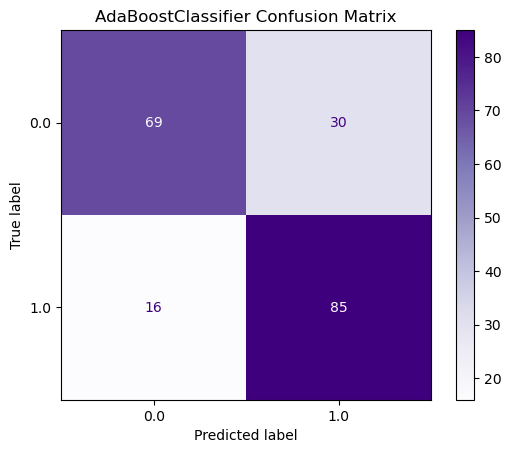

In [177]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# Modeli oluştur ve eğit
ada_model = AdaBoostClassifier()
ada_model.fit(X_train, y_train)

# Tahmin yap
y_pred_ada = ada_model.predict(X_test)

# Sınıflandırma raporu
print("🎯 AdaBoostClassifier Classification Report:")
print(classification_report(y_test, y_pred_ada, digits=2))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_ada, cmap="Purples", values_format="d")
plt.title("AdaBoostClassifier Confusion Matrix")
plt.show()

In [151]:
plot_importance(ada_model, X)

NameError: name 'ada_model' is not defined

## 2. XGBClassifierm

🔍 XGBClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       102
           1       0.86      0.86      0.86        51

    accuracy                           0.91       153
   macro avg       0.90      0.90      0.90       153
weighted avg       0.91      0.91      0.91       153



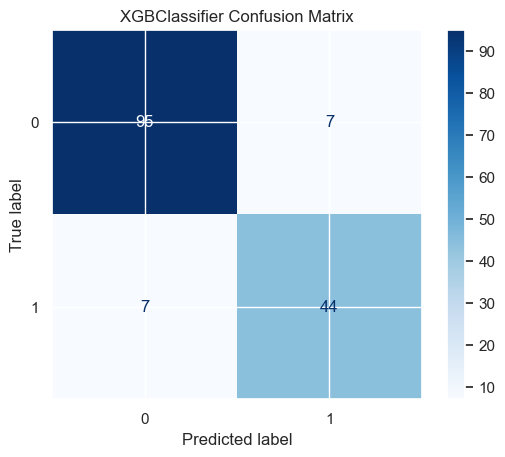

In [259]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("🔍 XGBClassifier Classification Report:")
print(classification_report(y_test, y_pred_xgb, digits=2))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_xgb, cmap="Blues", values_format="d")
plt.title("XGBClassifier Confusion Matrix")
plt.show()

   Value                   Feature
4   0.42                   Insulin
7   0.14                       Age
3   0.11             SkinThickness
1   0.10                   Glucose
0   0.07               Pregnancies
5   0.06                       BMI
2   0.06             BloodPressure
6   0.04  DiabetesPedigreeFunction


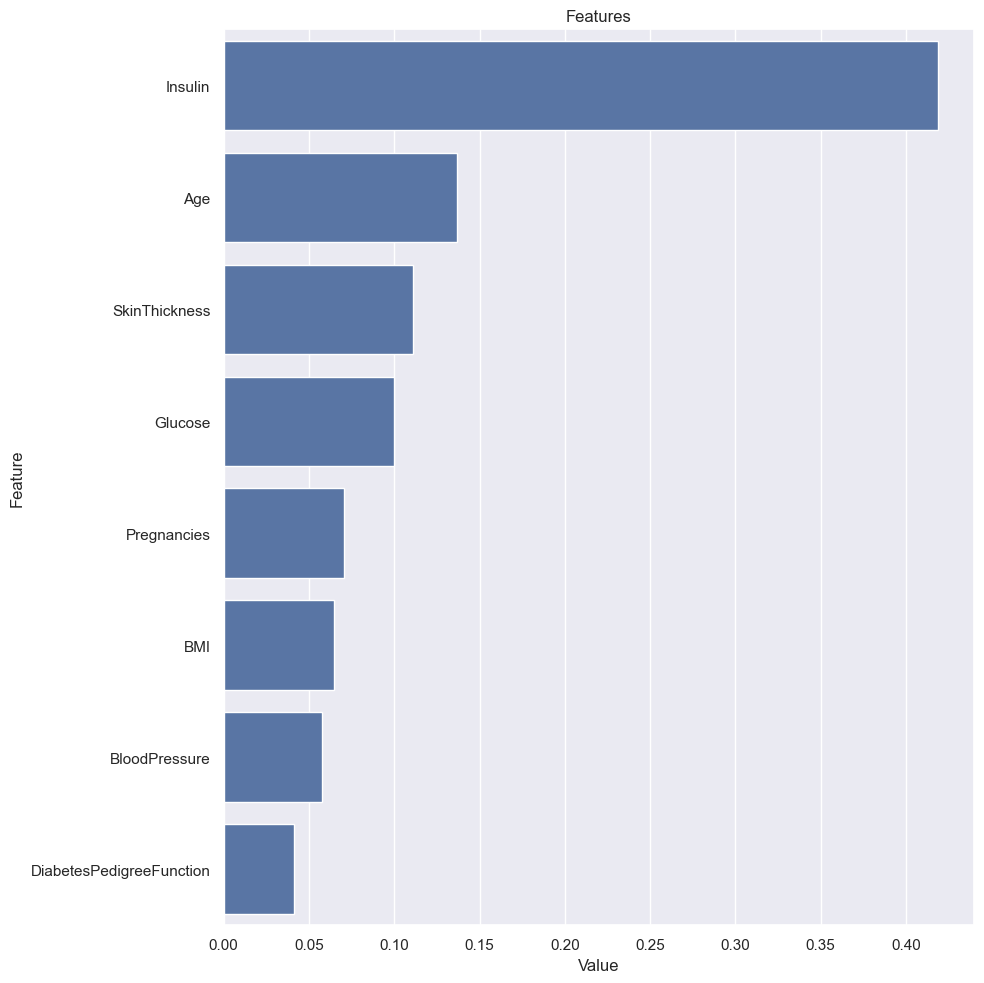

In [261]:
plot_importance(xgb_model, X)

## 3.RandomForestClassifier

🌳 RandomForestClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       102
           1       0.86      0.82      0.84        51

    accuracy                           0.90       153
   macro avg       0.89      0.88      0.88       153
weighted avg       0.89      0.90      0.89       153



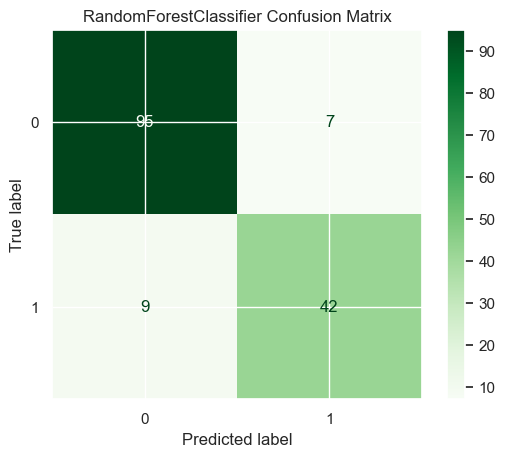

In [264]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Modeli tanımla ve eğit
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Tahmin yap
y_pred_rf = rf_model.predict(X_test)

# Sınıflandırma raporu
print("🌳 RandomForestClassifier Classification Report:")
print(classification_report(y_test, y_pred_rf, digits=2))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, cmap="Greens", values_format="d")
plt.title("RandomForestClassifier Confusion Matrix")
plt.show()

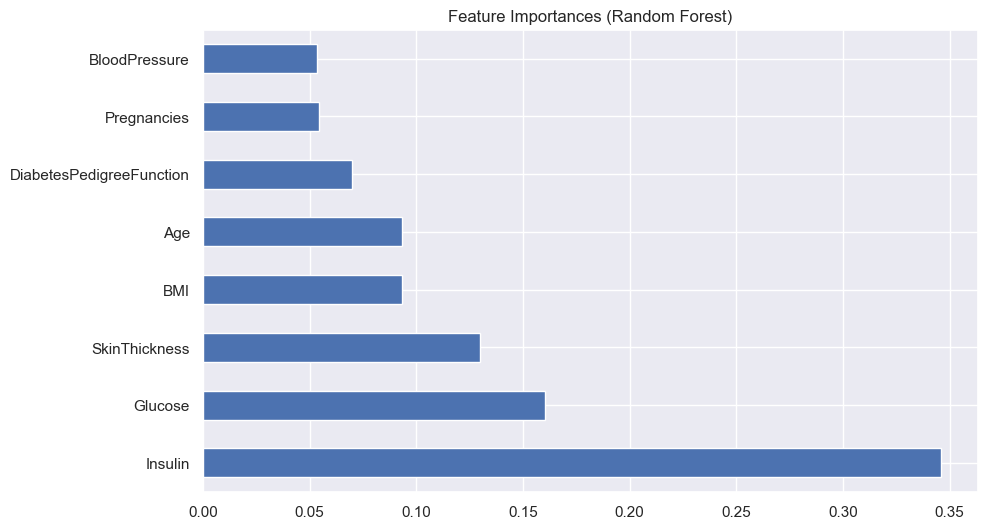

In [266]:
pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False).plot(kind="barh", figsize=(10,6))
plt.title("Feature Importances (Random Forest)")
plt.show()

# Eda_2

In [14]:
df2 = df_read.copy()
df2.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72             35        0 33.60                      0.63   50        1
1            1       85             66             29        0 26.60                      0.35   31        0
2            8      183             64              0        0 23.30                      0.67   32        1
3            1       89             66             23       94 28.10                      0.17   21        0
4            0      137             40             35      168 43.10                      2.29   33        1

## Missing Values

In [17]:
zero_columns= [col for col in df2.columns if (df2[col].min() == 0 and col not in ['Pregnancies','Outcome'])]

In [19]:
for col in zero_columns:
    df2[col] = df2[col].replace(0, np.nan)

In [21]:
df2.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [23]:
#knn missing v
scaler = MinMaxScaler()
df2 = pd.DataFrame(scaler.fit_transform(df2), columns=df2.columns)

imputer = KNNImputer(n_neighbors=5)
df2 = pd.DataFrame(imputer.fit_transform(df2), columns=df2.columns)

df2 = pd.DataFrame(scaler.inverse_transform(df2), columns=df2.columns)
df2.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction   Age  Outcome
0         6.00   148.00          72.00          35.00   334.20 33.60                      0.63 50.00     1.00
1         1.00    85.00          66.00          29.00    56.20 26.60                      0.35 31.00     0.00
2         8.00   183.00          64.00          32.20   238.00 23.30                      0.67 32.00     1.00
3         1.00    89.00          66.00          23.00    94.00 28.10                      0.17 21.00     0.00
4         0.00   137.00          40.00          35.00   168.00 43.10                      2.29 33.00     1.00

In [25]:
df2.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Outliers

In [76]:
for col in num_cols:
    print(col, outlier_thresholds(df2, col))

Pregnancies (-6.499999999999998, 13.499999999999996)
Glucose (36.0, 204.0)
BloodPressure (39.99999999999998, 104.00000000000003)
SkinThickness (4.874999999999989, 53.075)
Insulin (-60.199999999999974, 338.19999999999993)
BMI (13.599999999999994, 50.400000000000006)
DiabetesPedigreeFunction (-0.32999999999999996, 1.2)
Age (-1.5, 66.5)


In [78]:
for col in num_cols:
    print(col, check_outlier(df2, col))

Pregnancies True
Glucose False
BloodPressure True
SkinThickness True
Insulin True
BMI True
DiabetesPedigreeFunction True
Age True


In [80]:
for col in num_cols:
    replace_with_thresholds(df2, col)

In [82]:
for col in num_cols:
    print(col, check_outlier(df2, col))

Pregnancies False
Glucose False
BloodPressure False
SkinThickness False
Insulin False
BMI False
DiabetesPedigreeFunction False
Age False


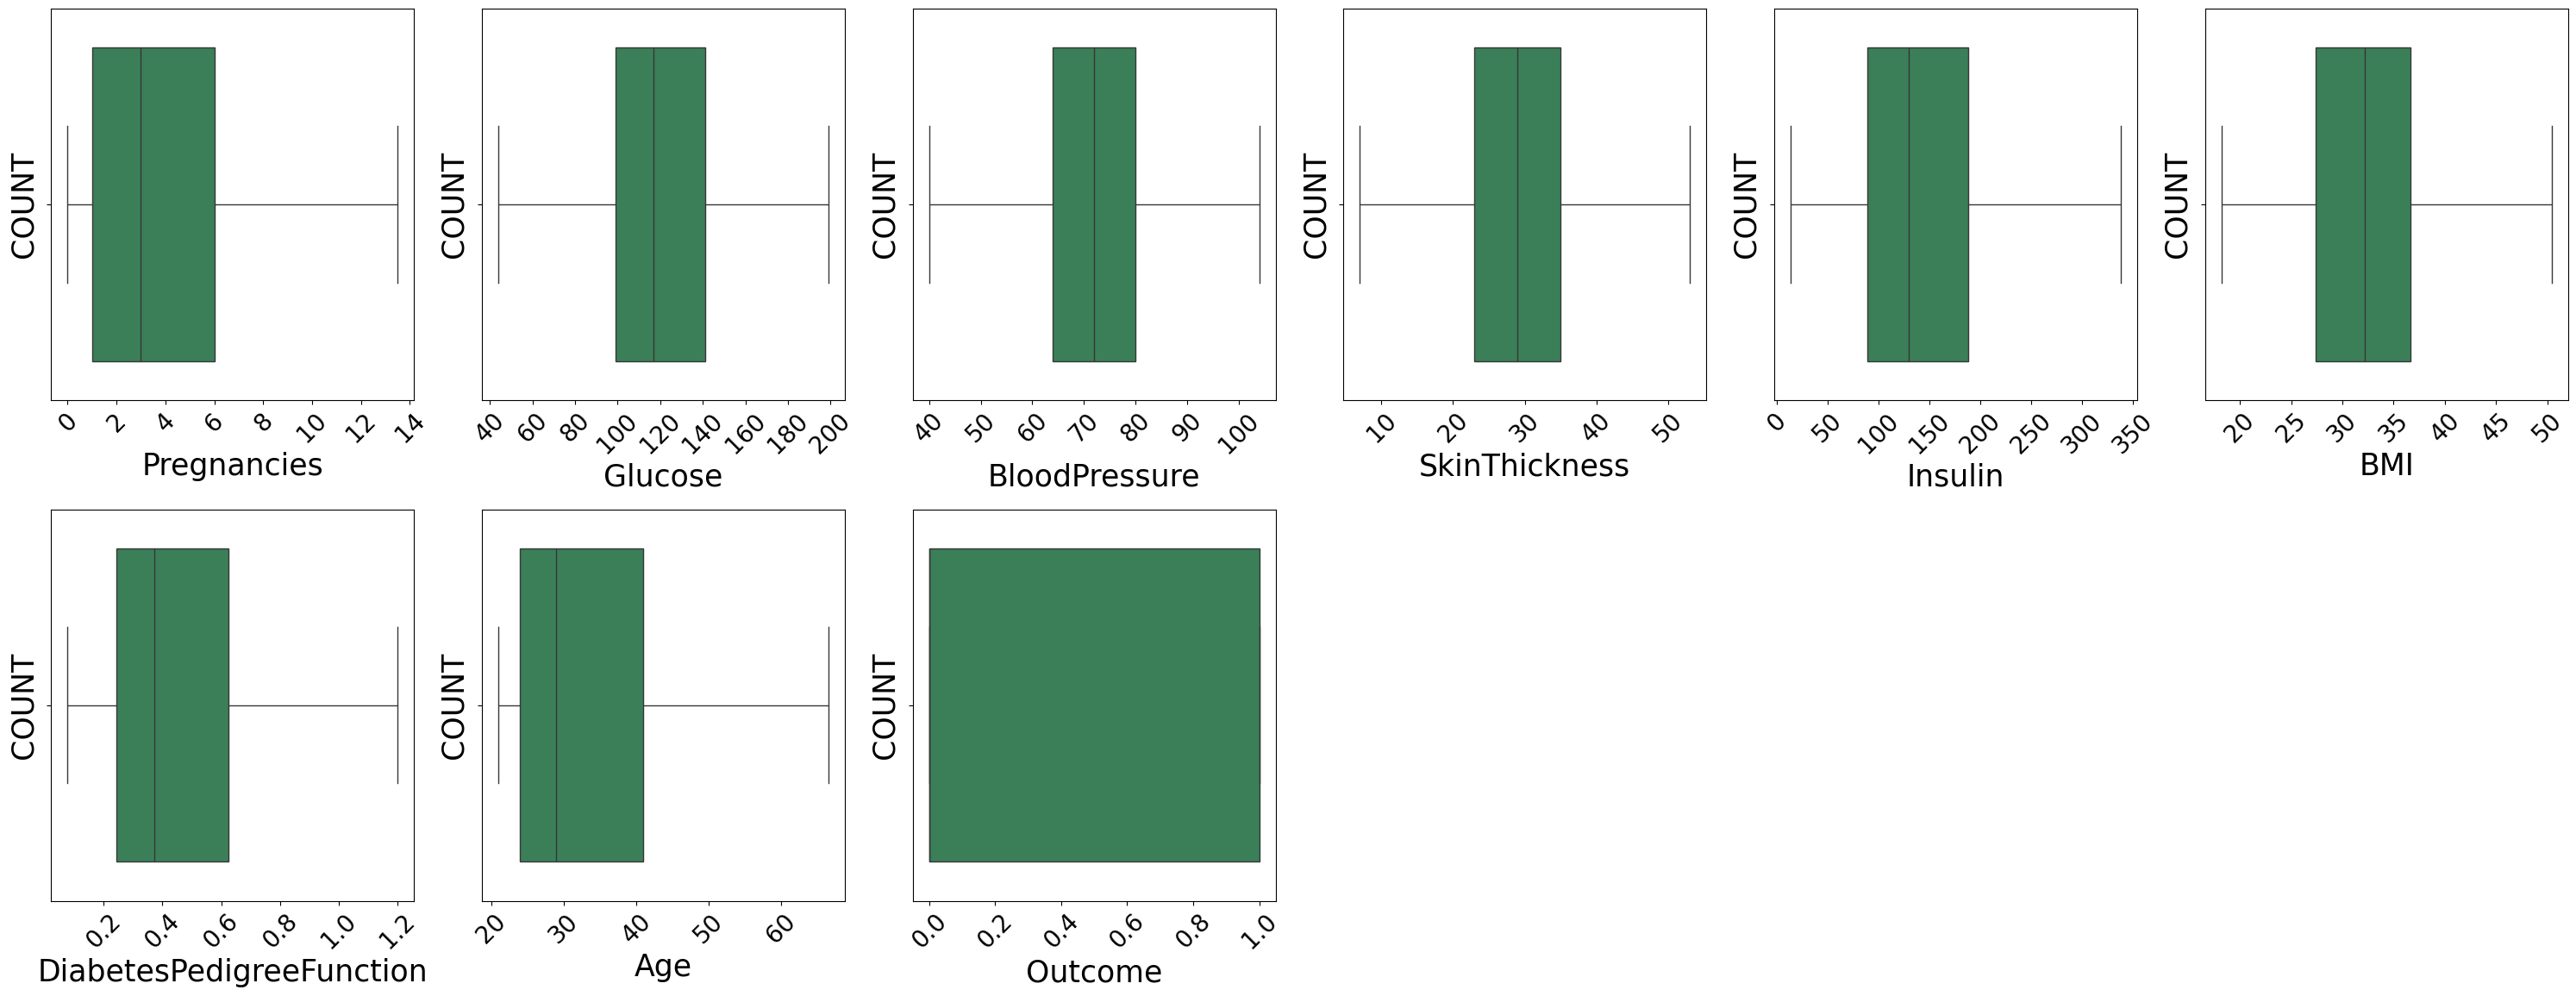

In [84]:

fig = plt.figure(figsize=(30,150))
for index,col in enumerate(df2):
    plt.subplot(26,6,index+1)
    sns.boxplot(x=col, data=df2.dropna(), color='seagreen')
    plt.ylabel('COUNT', size = 25,color="black" )
    plt.xlabel(col, fontsize = 25,color="black" )
    plt.xticks(size = 20,color="black", rotation = 45 )
    plt.yticks(size = 20,color="black" )

fig.tight_layout(pad=1.0)

## Feature Extraction

In [87]:
# Age  değişkeninden kategorik değişken oluşturma

df2.loc[(df2["Age"]>=20) & (df2["Age"]<=35),"New_Age_Group"] = "20-35 Yaş"
df2.loc[(df2["Age"]>36) & (df2["Age"]<=54),"New_Age_Group"] = "36-54 Yaş"
df2.loc[(df2["Age"]>55) & (df2["Age"]<=100),"New_Age_Group"] = "55 Yaş ve Üstü"

In [89]:
df2.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction   Age  Outcome New_Age_Group
0         6.00   148.00          72.00          35.00   334.20 33.60                      0.63 50.00     1.00     36-54 Yaş
1         1.00    85.00          66.00          29.00    56.20 26.60                      0.35 31.00     0.00     20-35 Yaş
2         8.00   183.00          64.00          32.20   238.00 23.30                      0.67 32.00     1.00     20-35 Yaş
3         1.00    89.00          66.00          23.00    94.00 28.10                      0.17 21.00     0.00     20-35 Yaş
4         0.00   137.00          40.00          35.00   168.00 43.10                      1.20 33.00     1.00     20-35 Yaş

In [91]:
# BMI  değişkeninden kategorik değişken oluşturma

df2.loc[(df2["BMI"]>=0) & (df2["BMI"]<=24.9),"New_BMI_Group"] = "Normal veya Zayıf"
df2.loc[(df2["BMI"]>25) & (df2["BMI"]<=29.9),"New_BMI_Group"] = "Fazla Kilolu"
df2.loc[(df2["BMI"]>30) & (df2["BMI"]<=100),"New_BMI_Group"] = "Obez"

In [93]:
df2.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction   Age  Outcome New_Age_Group      New_BMI_Group
0         6.00   148.00          72.00          35.00   334.20 33.60                      0.63 50.00     1.00     36-54 Yaş               Obez
1         1.00    85.00          66.00          29.00    56.20 26.60                      0.35 31.00     0.00     20-35 Yaş       Fazla Kilolu
2         8.00   183.00          64.00          32.20   238.00 23.30                      0.67 32.00     1.00     20-35 Yaş  Normal veya Zayıf
3         1.00    89.00          66.00          23.00    94.00 28.10                      0.17 21.00     0.00     20-35 Yaş       Fazla Kilolu
4         0.00   137.00          40.00          35.00   168.00 43.10                      1.20 33.00     1.00     20-35 Yaş               Obez

In [95]:
# Obez olan ve glukoz seviyesi riskli olan hastalar
df2["NEW_Obez_RiskGlucose"] = df2.apply(lambda x: 1 if (x["New_BMI_Group"] == 'Obez') and (x["Glucose"] >125 ) else 0, axis=1)

In [97]:
df2.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction   Age  Outcome New_Age_Group      New_BMI_Group  NEW_Obez_RiskGlucose
0         6.00   148.00          72.00          35.00   334.20 33.60                      0.63 50.00     1.00     36-54 Yaş               Obez                     1
1         1.00    85.00          66.00          29.00    56.20 26.60                      0.35 31.00     0.00     20-35 Yaş       Fazla Kilolu                     0
2         8.00   183.00          64.00          32.20   238.00 23.30                      0.67 32.00     1.00     20-35 Yaş  Normal veya Zayıf                     0
3         1.00    89.00          66.00          23.00    94.00 28.10                      0.17 21.00     0.00     20-35 Yaş       Fazla Kilolu                     0
4         0.00   137.00          40.00          35.00   168.00 43.10                      1.20 33.00     1.00     20-35 Yaş               Obez                     1

In [99]:
df2.dtypes

Pregnancies                 float64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
Outcome                     float64
New_Age_Group                object
New_BMI_Group                object
NEW_Obez_RiskGlucose          int64
dtype: object

In [101]:
# Yeni üretilen değişkenler için cat, num ayırımını tekrar yapalım.
cat_cols = [col for col in df2.columns if df2[col].dtypes == "O"]
num_cols = [col for col in df2.columns if df2[col].dtypes != "O"]

In [103]:
cat_cols

['New_Age_Group', 'New_BMI_Group']

## ENCODING

## get_dummies

In [106]:
df2 = pd.get_dummies(df2, columns=cat_cols, drop_first=True)

In [108]:
df2.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction   Age  Outcome  NEW_Obez_RiskGlucose  New_Age_Group_36-54 Yaş  New_Age_Group_55 Yaş ve Üstü  New_BMI_Group_Normal veya Zayıf  New_BMI_Group_Obez
0         6.00   148.00          72.00          35.00   334.20 33.60                      0.63 50.00     1.00                     1                     True                         False                            False                True
1         1.00    85.00          66.00          29.00    56.20 26.60                      0.35 31.00     0.00                     0                    False                         False                            False               False
2         8.00   183.00          64.00          32.20   238.00 23.30                      0.67 32.00     1.00                     0                    False                         False                             True               False
3         1.00    89.00          66.00          23.00    94.00 28.10                      0.17 21.00     0.00                     0                    False                         False                            False               False
4         0.00   137.00          40.00          35.00   168.00 43.10                      1.20 33.00     1.00                     1                    False                         False                            False                True

## Smote

In [130]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# 1. Özellikleri (X) ve hedef değişkeni (y) ayır
A = df2.drop("Outcome", axis=1)
B = df2["Outcome"]

# 2. SMOTE nesnesini oluştur
smote = SMOTE(random_state=42)

# 3. SMOTE uygulayarak veriyi dengele
X_resampled, y_resampled = smote.fit_resample(A, B)

# 4. Yeni dengelenmiş veri çerçevesini oluştur
df2_resampled = pd.concat([pd.DataFrame(X_resampled, columns=A.columns),
                           pd.DataFrame(y_resampled, columns=["Outcome"])], axis=1)

# 5. Sınıf dağılımını kontrol et
print("Orijinal veri dağılımı:", Counter(B))
print("SMOTE sonrası veri dağılımı:", Counter(y_resampled))

# İlk birkaç satırı göster
df2_resampled.head()

Orijinal veri dağılımı: Counter({0.0: 500, 1.0: 268})
SMOTE sonrası veri dağılımı: Counter({1.0: 500, 0.0: 500})


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction   Age  NEW_Obez_RiskGlucose  Outcome
0         6.00   148.00          72.00          35.00   334.20 33.60                      0.63 50.00                     1     1.00
1         1.00    85.00          66.00          29.00    56.20 26.60                      0.35 31.00                     0     0.00
2         8.00   183.00          64.00          32.20   238.00 23.30                      0.67 32.00                     0     1.00
3         1.00    89.00          66.00          23.00    94.00 28.10                      0.17 21.00                     0     0.00
4         0.00   137.00          40.00          35.00   168.00 43.10                      1.20 33.00                     1     1.00

In [132]:
X = df2_resampled.drop('Outcome', axis=1)
y = df2_resampled['Outcome']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print ("X_train: ", X_train.shape)
print ("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print ("y_test: ", y_test.shape)

X_train:  (800, 9)
y_train:  (800,)
X_test:  (200, 9)
y_test:  (200,)


# ADVANCED MODEL

In [135]:
from lazypredict.Supervised import LazyClassifier
from sklearn.metrics import recall_score

# Recall metriği için özel fonksiyon
def recall(y_true, y_pred):
    return recall_score(y_true, y_pred)

# LazyClassifier recall'u da ölçsün
clf = LazyClassifier(ignore_warnings=True, custom_metric=recall)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

  0%|          | 0/29 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 399, number of negative: 401
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000054 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1406
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498750 -> initscore=-0.005000
[LightGBM] [Info] Start training from score -0.005000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  recall  Time Taken
Model                                   

In [99]:
#ExtraTreesClassifier
#PassiveAggressiveClassifier
#RandomForestClassifier

🌲 ExtraTreesClassifier Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.76      0.81        99
         1.0       0.79      0.89      0.84       101

    accuracy                           0.82       200
   macro avg       0.83      0.82      0.82       200
weighted avg       0.83      0.82      0.82       200



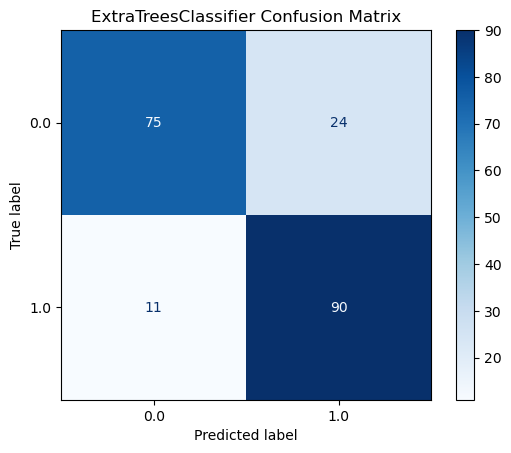

In [101]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Modeli tanımla ve eğit
et_model = ExtraTreesClassifier(random_state=42)
et_model.fit(X_train, y_train)

# Tahmin yap
y_pred_et = et_model.predict(X_test)

# Sınıflandırma raporu
print("🌲 ExtraTreesClassifier Classification Report:")
print(classification_report(y_test, y_pred_et, digits=2))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_et, cmap="Blues", values_format="d")
plt.title("ExtraTreesClassifier Confusion Matrix")
plt.show()

    Value                          Feature
4    0.15                          Insulin
1    0.13                          Glucose
7    0.09                              Age
8    0.08             NEW_Obez_RiskGlucose
5    0.08                              BMI
6    0.08         DiabetesPedigreeFunction
3    0.08                    SkinThickness
0    0.07                      Pregnancies
2    0.07                    BloodPressure
12   0.07               New_BMI_Group_Obez
9    0.06          New_Age_Group_36-54 Yaş
11   0.02  New_BMI_Group_Normal veya Zayıf
10   0.01     New_Age_Group_55 Yaş ve Üstü


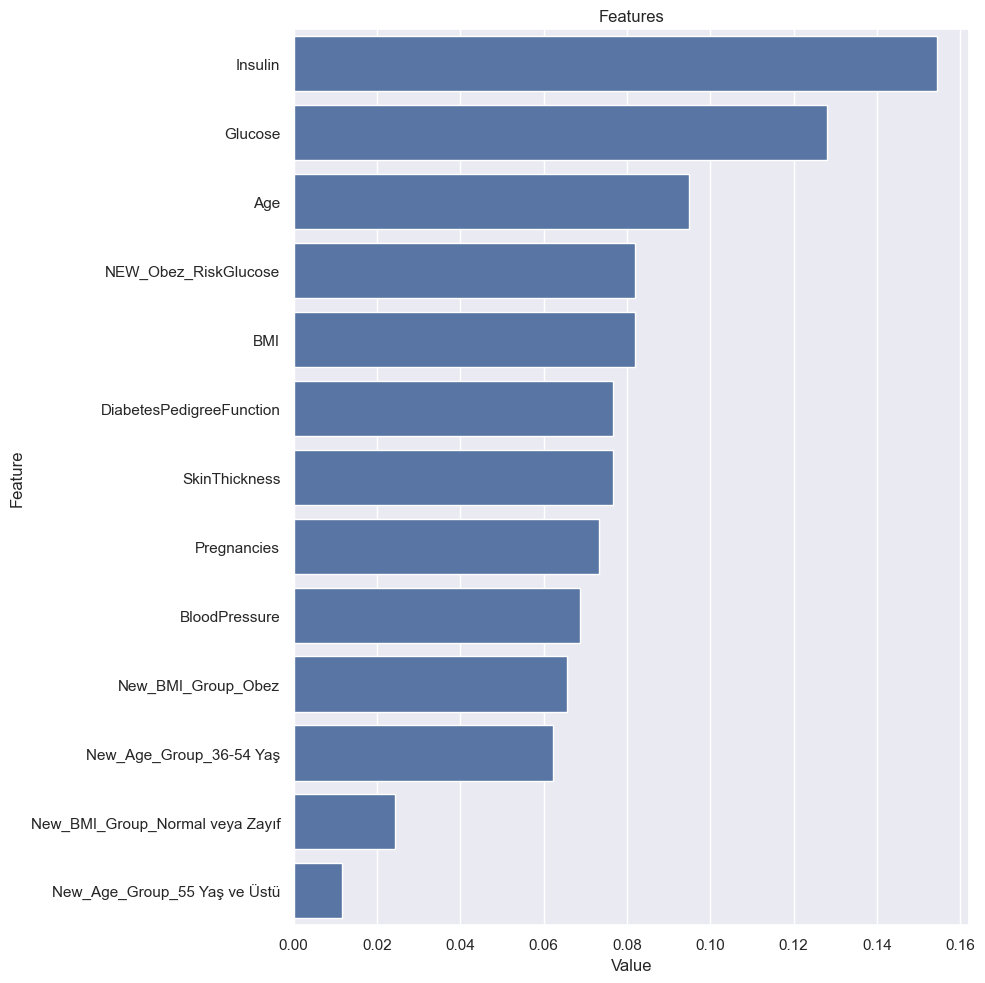

In [110]:
plot_importance(et_model, X)

## İhtiyaç Olamayan Kolonların Düşürülmesi

In [137]:
df2.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'NEW_Obez_RiskGlucose'], dtype='object')

In [139]:
columns_to_drop = [
    'New_BMI_Group_Obez',
    'New_Age_Group_36-54 Yaş',
    'New_BMI_Group_Normal veya Zayıf',
    'New_Age_Group_55 Yaş ve Üstü'
]

df2 = df2.drop(columns=columns_to_drop)

KeyError: "['New_BMI_Group_Obez', 'New_Age_Group_36-54 Yaş', 'New_BMI_Group_Normal veya Zayıf', 'New_Age_Group_55 Yaş ve Üstü'] not found in axis"

In [141]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    float64
 9   NEW_Obez_RiskGlucose      768 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 60.1 KB


In [143]:
from lazypredict.Supervised import LazyClassifier
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split

# X ve y zaten şöyle hazırlanmıştı:
# X = df2_resampled.drop('Outcome', axis=1)
# y = df2_resampled['Outcome']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Recall metriği için özel bir fonksiyon
def recall(y_true, y_pred):
    return recall_score(y_true, y_pred)

# LazyClassifier'ı başlatalım
clf = LazyClassifier(ignore_warnings=True, custom_metric=recall)

# Modeli fit edelim
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Modellerin sonuçlarını yazdıralım
print(models)

  0%|          | 0/29 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 399, number of negative: 401
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000081 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1406
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498750 -> initscore=-0.005000
[LightGBM] [Info] Start training from score -0.005000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  recall  Time Taken
Model                                   

## 1.ExtraTreesClassifier

In [155]:

# 1. ExtraTreesClassifier modelini oluştur
et_model = ExtraTreesClassifier(random_state=42)

# 2. Modeli eğitim verisiyle eğit
et_model.fit(X_train, y_train)

# 3. Test verisi ile tahmin yap
y_pred_et = et_model.predict(X_test)

# 4. Sınıflandırma raporunu yazdır
print("🌲 ExtraTreesClassifier Classification Report:")
print(classification_report(y_test, y_pred_et, digits=2))

# 5. Confusion Matrix'i çiz
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_et, cmap="Blues", values_format="d"
)
plt.title("ExtraTreesClassifier Confusion Matrix")
plt.show()

🌲 ExtraTreesClassifier Classification Report:


NameError: name 'classification_report' is not defined

   Value                   Feature
4   0.19                   Insulin
1   0.15                   Glucose
7   0.13                       Age
8   0.10      NEW_Obez_RiskGlucose
3   0.10             SkinThickness
5   0.10                       BMI
0   0.08               Pregnancies
6   0.08  DiabetesPedigreeFunction
2   0.08             BloodPressure


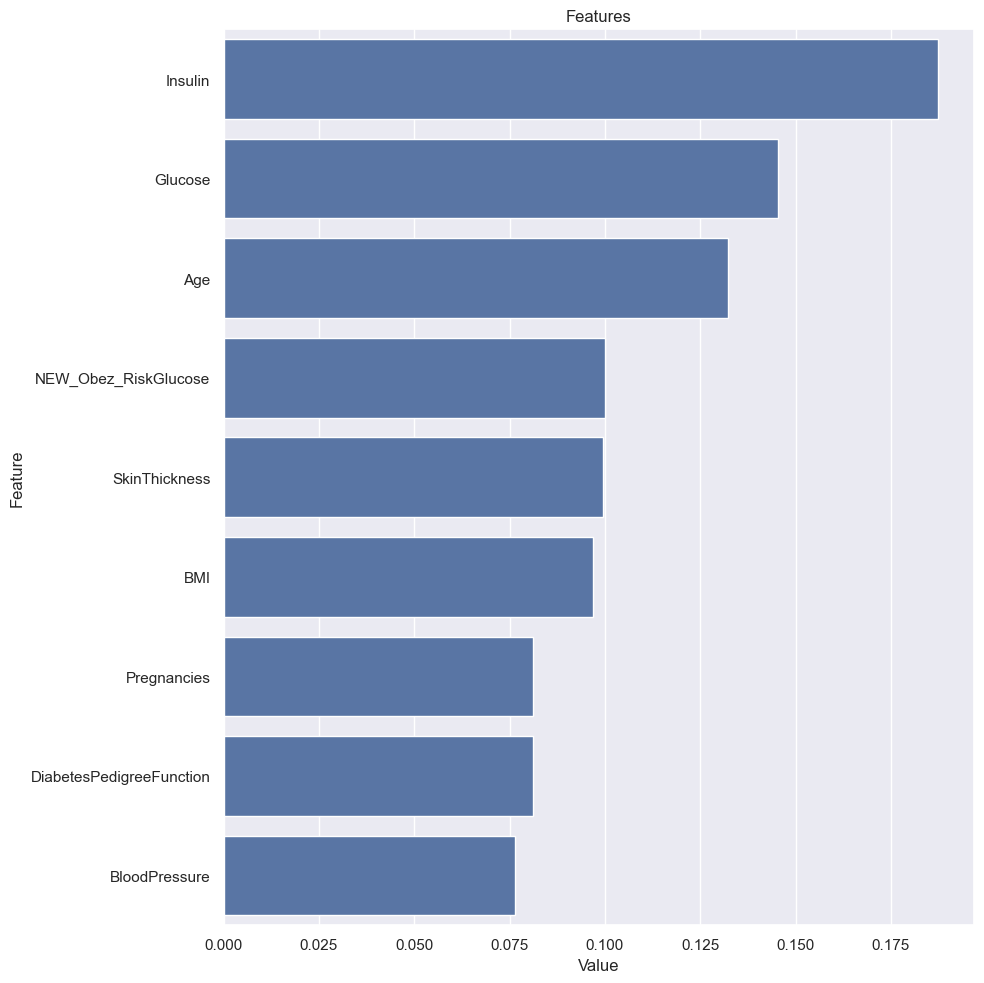

In [348]:
plot_importance(et_model, X)

## 2.RandomForestClassifier

In [161]:
# 1. RandomForestClassifier modelini oluştur
rf_model = RandomForestClassifier(random_state=42)

# 2. Modeli eğitim verisiyle eğit
rf_model.fit(X_train, y_train)

# 3. Test verisi ile tahmin yap
y_pred_rf = rf_model.predict(X_test)

# 4. Sınıflandırma raporunu yazdır
print("🌳 RandomForestClassifier Classification Report:")
print(classification_report(y_test, y_pred_rf, digits=2))

# 5. Confusion Matrix'i çiz
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_rf, cmap="Greens", values_format="d"
)
plt.title("RandomForestClassifier Confusion Matrix")
plt.show()

🌳 RandomForestClassifier Classification Report:


NameError: name 'classification_report' is not defined

   Value                   Feature
4   0.23                   Insulin
1   0.19                   Glucose
7   0.12                       Age
5   0.12                       BMI
3   0.10             SkinThickness
6   0.08  DiabetesPedigreeFunction
2   0.07             BloodPressure
0   0.06               Pregnancies
8   0.04      NEW_Obez_RiskGlucose


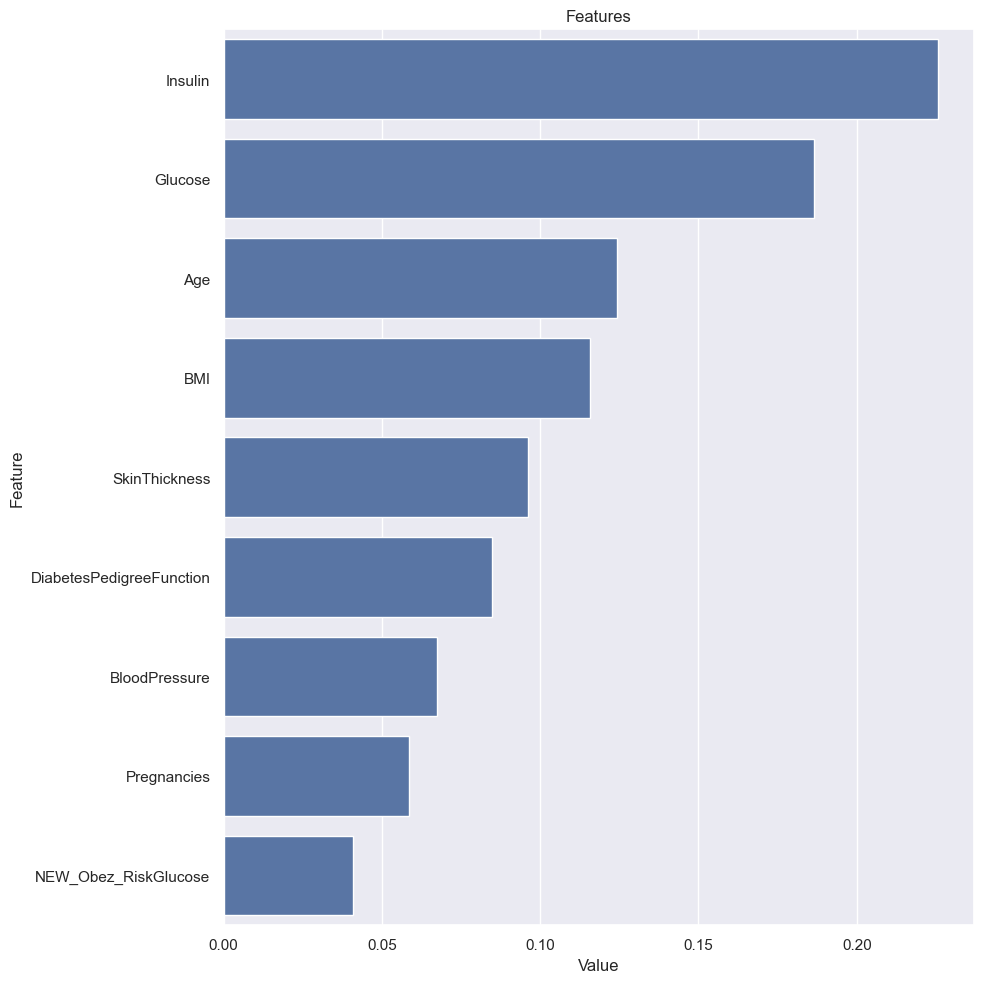

In [352]:
plot_importance(rf_model, X)

## 3.PassiveAggressiveClassifier

😤 PassiveAggressiveClassifier Classification Report:
              precision    recall  f1-score   support

         0.0       0.71      0.48      0.57        99
         1.0       0.61      0.80      0.70       101

    accuracy                           0.65       200
   macro avg       0.66      0.64      0.64       200
weighted avg       0.66      0.65      0.64       200



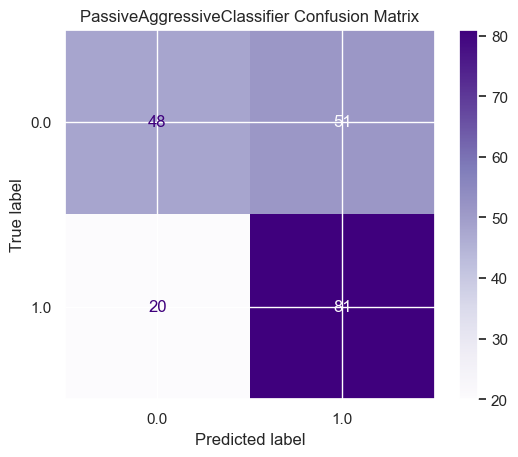

In [355]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. PassiveAggressiveClassifier modelini oluştur
pa_model = PassiveAggressiveClassifier(random_state=42)

# 2. Modeli eğitim verisiyle eğit
pa_model.fit(X_train, y_train)

# 3. Test verisi ile tahmin yap
y_pred_pa = pa_model.predict(X_test)

# 4. Sınıflandırma raporunu yazdır
print("😤 PassiveAggressiveClassifier Classification Report:")
print(classification_report(y_test, y_pred_pa, digits=2))

# 5. Confusion Matrix'i çiz
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_pa, cmap="Purples", values_format="d"
)
plt.title("PassiveAggressiveClassifier Confusion Matrix")
plt.show()

## 4.XGBClassifierm

🔍 XGBClassifier Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.74      0.81        99
         1.0       0.78      0.91      0.84       101

    accuracy                           0.82       200
   macro avg       0.83      0.82      0.82       200
weighted avg       0.83      0.82      0.82       200



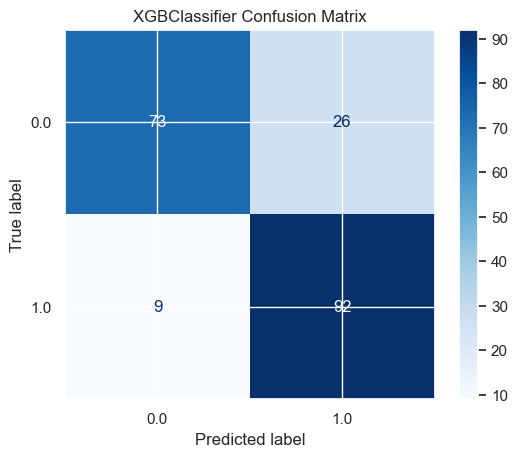

In [362]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("🔍 XGBClassifier Classification Report:")
print(classification_report(y_test, y_pred_xgb, digits=2))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_xgb, cmap="Blues", values_format="d")
plt.title("XGBClassifier Confusion Matrix")
plt.show()

   Value                   Feature
4   0.24                   Insulin
1   0.13                   Glucose
7   0.12                       Age
8   0.12      NEW_Obez_RiskGlucose
5   0.11                       BMI
3   0.08             SkinThickness
6   0.08  DiabetesPedigreeFunction
0   0.06               Pregnancies
2   0.06             BloodPressure


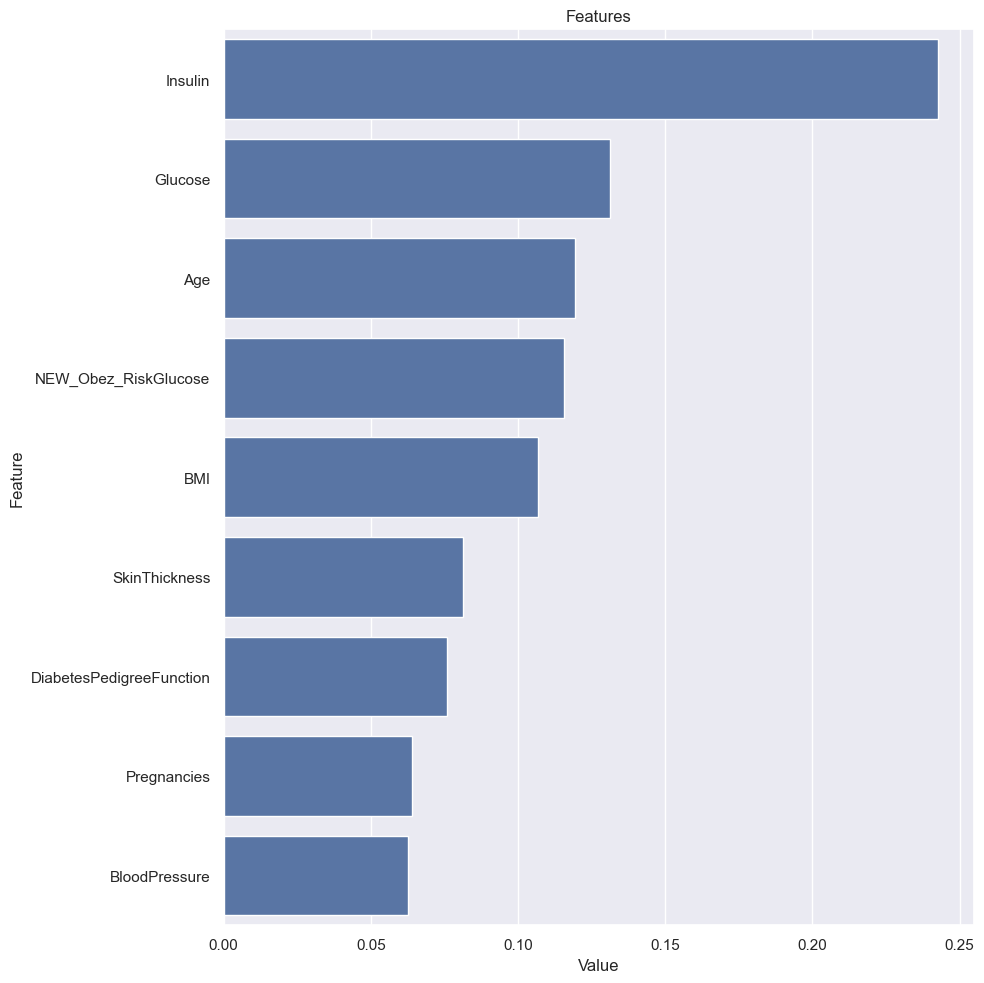

In [360]:
plot_importance(xgb_model, X)

## 5.AdaBoostClassifier

🚀 AdaBoostClassifier Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.70      0.75        99
         1.0       0.74      0.84      0.79       101

    accuracy                           0.77       200
   macro avg       0.78      0.77      0.77       200
weighted avg       0.78      0.77      0.77       200



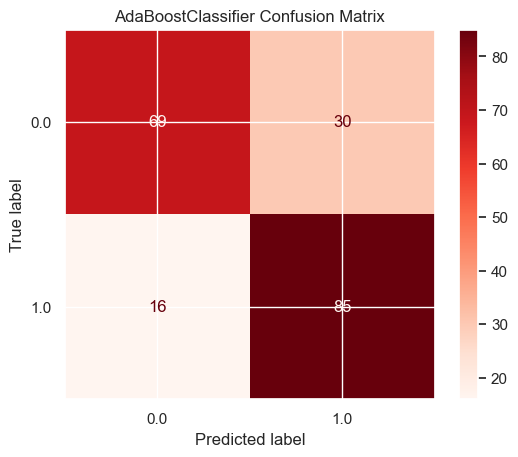

In [364]:
# 1. AdaBoostClassifier modelini oluştur
ab_model = AdaBoostClassifier(random_state=42)

# 2. Modeli eğitim verisiyle eğit
ab_model.fit(X_train, y_train)

# 3. Test verisi ile tahmin yap
y_pred_ab = ab_model.predict(X_test)

# 4. Sınıflandırma raporunu yazdır
print("🚀 AdaBoostClassifier Classification Report:")
print(classification_report(y_test, y_pred_ab, digits=2))

# 5. Confusion Matrix'i çiz
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_ab, cmap="Reds", values_format="d"
)
plt.title("AdaBoostClassifier Confusion Matrix")
plt.show()

## 6.Svc

⚡ SVC (Support Vector Classifier) Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.63      0.70        99
         1.0       0.69      0.83      0.76       101

    accuracy                           0.73       200
   macro avg       0.74      0.73      0.73       200
weighted avg       0.74      0.73      0.73       200



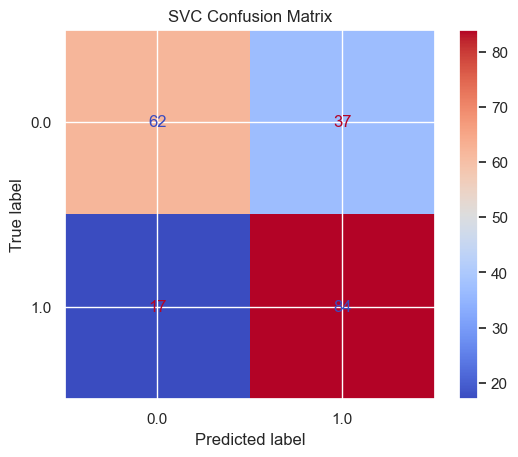

In [367]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. SVC modelini oluştur
svc_model = SVC(random_state=42)

# 2. Modeli eğitim verisiyle eğit
svc_model.fit(X_train, y_train)

# 3. Test verisi ile tahmin yap
y_pred_svc = svc_model.predict(X_test)

# 4. Sınıflandırma raporunu yazdır
print("⚡ SVC (Support Vector Classifier) Classification Report:")
print(classification_report(y_test, y_pred_svc, digits=2))

# 5. Confusion Matrix'i çiz
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_svc, cmap="coolwarm", values_format="d"
)
plt.title("SVC Confusion Matrix")
plt.show()

## 7.LabelSpreading 

🌟 LabelSpreading Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.64      0.71        99
         1.0       0.70      0.85      0.77       101

    accuracy                           0.74       200
   macro avg       0.76      0.74      0.74       200
weighted avg       0.76      0.74      0.74       200



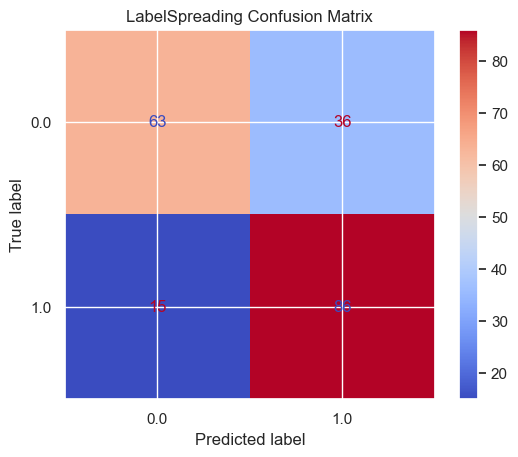

In [370]:
from sklearn.semi_supervised import LabelSpreading
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. LabelSpreading modelini oluştur
ls_model = LabelSpreading(kernel='knn', gamma=0.25)  # 'knn' kernel ve gamma değeri ile model

# 2. Modeli eğitim verisiyle eğit
ls_model.fit(X_train, y_train)

# 3. Test verisi ile tahmin yap
y_pred_ls = ls_model.predict(X_test)

# 4. Sınıflandırma raporunu yazdır
print("🌟 LabelSpreading Classification Report:")
print(classification_report(y_test, y_pred_ls, digits=2))

# 5. Confusion Matrix'i çiz
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_ls, cmap="coolwarm", values_format="d"
)
plt.title("LabelSpreading Confusion Matrix")
plt.show()

## 8.LabelPropagation 

🌟 LabelPropagation Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.67      0.73        99
         1.0       0.72      0.85      0.78       101

    accuracy                           0.76       200
   macro avg       0.77      0.76      0.76       200
weighted avg       0.77      0.76      0.76       200



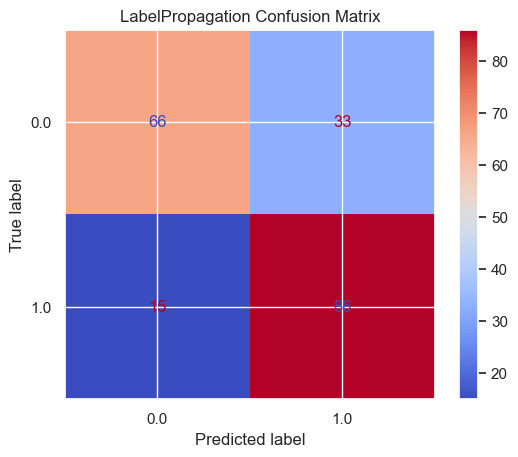

In [373]:
from sklearn.semi_supervised import LabelPropagation
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. LabelPropagation modelini oluştur
lp_model = LabelPropagation(kernel='knn', gamma=0.25)  # 'knn' kernel ve gamma değeri ile model

# 2. Modeli eğitim verisiyle eğit
lp_model.fit(X_train, y_train)

# 3. Test verisi ile tahmin yap
y_pred_lp = lp_model.predict(X_test)

# 4. Sınıflandırma raporunu yazdır
print("🌟 LabelPropagation Classification Report:")
print(classification_report(y_test, y_pred_lp, digits=2))

# 5. Confusion Matrix'i çiz
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_lp, cmap="coolwarm", values_format="d"
)
plt.title("LabelPropagation Confusion Matrix")
plt.show()

##  Hyperparameter Optimization

### Random Forests HPO

In [163]:
from sklearn.model_selection import GridSearchCV

In [165]:
rf_model = RandomForestClassifier(random_state=42)

rf_params = {"max_depth": [8, 10, None],
             "max_features": [10, 15, 20],
             "min_samples_split": [2,10],
             "n_estimators": [100]} 

In [167]:
rf_best_grid = GridSearchCV(rf_model, rf_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [169]:
rf_best_grid.best_params_

{'max_depth': 10,
 'max_features': 10,
 'min_samples_split': 2,
 'n_estimators': 100}

In [171]:
rf_final = rf_model.set_params(**rf_best_grid.best_params_, random_state=42).fit(X, y)

In [173]:
y_pred = rf_final.predict(X_test)

🌳 RandomForestClassifier Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98        99
         1.0       0.96      1.00      0.98       101

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



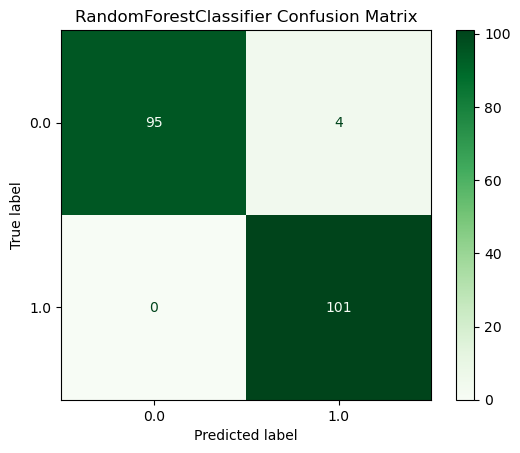

In [179]:
# 4. Sınıflandırma raporunu yazdır
print("🌳 RandomForestClassifier Classification Report:")
print(classification_report(y_test, y_pred, digits=2))

# 5. Confusion Matrix'i çiz
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, cmap="Greens", values_format="d"
)
plt.title("RandomForestClassifier Confusion Matrix")
plt.show()

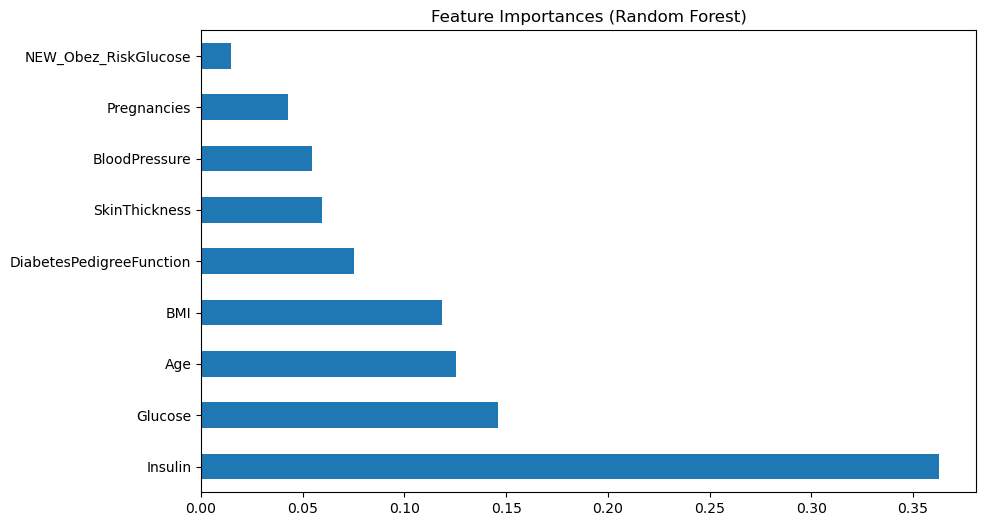

In [181]:
pd.Series(rf_final.feature_importances_, index=X.columns).sort_values(ascending=False).plot(kind="barh", figsize=(10,6))
plt.title("Feature Importances (Random Forest)")
plt.show()

In [183]:
#from sklearn.metrics import classification_report
rand_score_test=rf_final.score(X_test, y_test)
rand_score_train=rf_final.score(X_train, y_train)


print("Accuracy Score (Test) :",rand_score_test)
print("Accuracy Score (Train):",rand_score_train)

Accuracy Score (Test) : 0.98
Accuracy Score (Train): 0.98625


In [185]:
from sklearn.metrics import recall_score

# Eğitim ve test verisi için tahminler
y_pred_test = rf_final.predict(X_test)
y_pred_train = rf_final.predict(X_train)

# Recall skorlarını hesapla (ikili sınıflandırma varsayılarak)
recall_test = recall_score(y_test, y_pred)
recall_train = recall_score(y_train, y_pred_train)

print("Recall (Test):", recall_test)
print("Recall (Train):", recall_train)

Recall (Test): 1.0
Recall (Train): 1.0


In [187]:
from sklearn.model_selection import cross_val_score
#from sklearn.ensemble import RandomForestClassifier

# 5-fold cross-validation ile accuracy ölç
cv_scores = cross_val_score(rf_final, X, y, cv=5, scoring='accuracy')

# Sonuçları yazdır
print("Cross-validation accuracy scores:", cv_scores)
print("Ortalama accuracy:", cv_scores.mean())

Cross-validation accuracy scores: [0.785 0.815 0.85  0.895 0.88 ]
Ortalama accuracy: 0.8450000000000001


In [189]:

# Recall için cross-validation
recall_scores = cross_val_score(rf_model, X, y, cv=5, scoring='recall')

# Sonuçları yazdır
print("Cross-validation recall scores:", recall_scores)
print("Ortalama recall:", recall_scores.mean())

Cross-validation recall scores: [0.81 0.85 0.87 0.97 0.95]
Ortalama recall: 0.89


In [193]:
from sklearn.metrics import precision_score



# Precision skorlarını hesapla
precision_test = precision_score(y_test, y_pred_test)
precision_train = precision_score(y_train, y_pred_train)

print("Precision (Test):", precision_test)
print("Precision (Train):", precision_train)

# Çapraz doğrulama ile precision hesaplama
precision_cv_scores = cross_val_score(rf_final, X, y, cv=5, scoring='precision')

print("\nCross-validation precision scores:", precision_cv_scores)
print("Ortalama precision:", precision_cv_scores.mean())

Precision (Test): 0.9619047619047619
Precision (Train): 0.973170731707317

Cross-validation precision scores: [0.77142857 0.79439252 0.83653846 0.84347826 0.83333333]
Ortalama precision: 0.8158342301068835
